In [1]:
import os
import json
import pandas as pd

Které knihy jsou ve srovnání: česká fikce a non-fikce vydaná v letech 2023 a 2024, u které se podařilo načíst ISBN z Martinus.cz a prostřednictvím tohoto ISBN stáhnout data z Goodreads a Databáze knih.

## Goodreads

In [2]:
gr = pd.read_csv(os.path.join("data","goodreads-hodnoceni.csv"))

In [5]:
gr.columns

Index(['GR_isbn', 'GR_date', 'GR_title', 'GR_rating', 'GR_ratings_count',
       'GR_reviews', 'GR_published', 'GR_1_stars', 'GR_2_stars', 'GR_3_stars',
       'GR_4_stars', 'GR_5_stars'],
      dtype='object')

In [7]:
gr = gr.sort_values(by='GR_date')

In [9]:
gr['GR_date'].max()

'2024-11-25 03:39:11'

In [11]:
gr['GR_date'] = pd.to_datetime(gr['GR_date'])

In [13]:
    gr.groupby(pd.Grouper(key='GR_date', freq='W'))['GR_isbn'].nunique().tail(3).iloc[::-1]

GR_date
2024-12-01    1045
2024-11-24    1038
2024-11-17    1035
Freq: -1W-SUN, Name: GR_isbn, dtype: int64

In [15]:
gr_nejnovejsi = gr.groupby(pd.Grouper(key='GR_date', freq='W'))['GR_isbn'].nunique().tail(3).iloc[::-1].index.to_list()[1]

In [17]:
gr_nejnovejsi

Timestamp('2024-11-24 00:00:00')

In [19]:
starsi = gr[gr['GR_date'] <= str(gr_nejnovejsi)]['GR_title'].to_list()

In [21]:
novinky = gr[~gr['GR_title'].isin(starsi)]['GR_title'].to_list()
print("Novinky " + str(gr_nejnovejsi)[0:10] + "\n-", end =" ")
print('\n- '.join(novinky))

Novinky 2024-11-24
- Třicetiletá válka by Jan Kilián
- Andulka Andula by Patrik Hartl
- 50 příběhů pražského metra by Michaela Rulíšková
- Luna z lůna 3: Tajemství by Barbora Englischová
- Pohádky z malovaných hrníčků by Dana Doležalová
- V uniformě beránka by Václav Jabůrek
- Závojnatky by Jiří B. Mayer
- Kočičí škola by Iva Hoňková


### Nejlépe hodnocené knihy vůbec

In [23]:
gr[gr['GR_ratings_count'] >= 100].groupby('GR_title')['GR_rating'].last().nlargest(30)

GR_title
Zuzana Čaputová - Neztratit se sama sobě: Knižní rozhovor se slovenskou prezidentkou by Erik Tabery    4.80
Zuzana Čaputová: Neztratit se sama sobě by Erik Tabery                                                 4.78
U severní zdi by Petra Klabouchová                                                                     4.70
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická                    4.68
V pasti pohlaví by Silvie Lauder                                                                       4.60
Nepatrná ztráta osamělosti by Eli Beneš                                                                4.53
Stačí mávnout křídly (Stačí mávnout křídly, #1) by Sára Topinková                                      4.48
Severka by Nina Špitálníková                                                                           4.43
Krutý měsíc by Jana Jašová                                                                             4.41
Lásky čas by Adéla 

### Nejvíce hodnocení

In [25]:
gr.groupby("GR_title")['GR_ratings_count'].max().nlargest(30)

GR_title
Les v domě by Alena Mornštajnová                                                                       2340.0
Srpny by Jakub Stanjura                                                                                1459.0
Severka by Nina Špitálníková                                                                           1147.0
Těla by Klára Vlasáková                                                                                1021.0
Rozložíš paměť by Marek Torčík                                                                          938.0
Národní opruzení by Karolína Zoe Meixnerová                                                             684.0
Kde jsi, když nejsi by Radka Třeštíková                                                                 670.0
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická                     639.0
Jsme nevyhnutelní (Navždycky #4) by Nofreeusernames                                                     596.0
G

### Nejvíce nových hodnocení od dubna '24

In [27]:
pd.Series(gr.groupby("GR_title")['GR_ratings_count'].max() - gr.groupby("GR_title")['GR_ratings_count'].min()).nlargest(25)

GR_title
Rozložíš paměť by Marek Torčík                                                         637.0
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická    586.0
Severka by Nina Špitálníková                                                           532.0
Srpny by Jakub Stanjura                                                                523.0
Odvaha by Markéta Lukášková                                                            360.0
Těla by Klára Vlasáková                                                                297.0
Gazely by Patrik Hartl                                                                 245.0
Fosilie by Michal Kašpárek                                                             243.0
Lásky čas by Adéla Rosípalová                                                          235.0
U severní zdi by Petra Klabouchová                                                     197.0
V pasti pohlaví by Silvie Lauder                             

In [46]:
import datetime

In [47]:
two_weeks_ago = datetime.datetime.now() - datetime.timedelta(days=13)
two_weeks_ago = two_weeks_ago.strftime('%Y-%m-%d')

In [48]:
week_ago = datetime.datetime.now() - datetime.timedelta(days=6)
week_ago = week_ago.strftime('%Y-%m-%d')

In [49]:
month_ago = pd.to_datetime(gr['GR_date'].max()) - datetime.timedelta(days=29)
month_ago = month_ago.strftime('%Y-%m-%d')
month_ago

'2024-09-22'

In [50]:
gr_stare = gr[gr['GR_date'] < month_ago]['GR_title'].drop_duplicates().to_list()
gr_nove = gr[~gr['GR_title'].isin(gr_stare)]['GR_title'].drop_duplicates().to_list()
gr_nove

['Koutnice by Tereza Šustková',
 'Vítek, křupadlo a kostižrout by Petula Bendula',
 'Detektivové z Vílí říse (Czech Edition) by Iva Kenaz',
 'V Královských zahradách: Antologie k poctě mistra hororu by Aleš Richter',
 'Dvě sovy v nízkém letu by Michaela Keroušová',
 'Krhutoviny by Jiří Krhut',
 'Bobík: pes je přece taky člověk by Jiří Žáček',
 'S Rozárkou za štěstím by Lucie Strnadová',
 'Čistič by Vladimír Zlý',
 'Barvy empatie by Anina Perpello',
 'Přístav u řeky Styx by Pavel Fritz',
 'Třetí dcera by Leandra Sold',
 'Dceřina kletba by Tereza Bartošová',
 'Woodhill by Eleanor Corvin',
 'Srdečné pozdravy z Řecka by Alena Damijo',
 'Ticháček by Veronika Černucká',
 'Sudičky by Markéta Harasimová',
 'Dokonalé městečko by Kateřina Karolová',
 'Po stopách magie by Eliška Sladovníková',
 'Mery Je Iluze by Marian Staffen',
 'Koleje jsou pevně přibité k vidění by Luboš Svoboda',
 'Fušeři by Mikuláš Křepelka',
 'Dům za lesem by Marie Jakoubková',
 'Strážci živlů - Síla vody by Alice Lily nera

In [ ]:
gr[gr['GR_title'].str.contains('Flora',na=False)]

### Nejvíce hodnocení za poslední měsíc

In [52]:
goodreads_mesic_ratings = pd.Series(gr.groupby("GR_title")['GR_ratings_count'].max() - gr[gr['GR_date'] > month_ago].groupby("GR_title")['GR_ratings_count'].min()).sort_values(ascending=False)
goodreads_mesic_ratings = goodreads_mesic_ratings[goodreads_mesic_ratings >= 10]
goodreads_mesic_ratings

GR_title
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická                    55.0
Rozložíš paměť by Marek Torčík                                                                         51.0
Ignis fatuus by Petra Klabouchová                                                                      50.0
Severka by Nina Špitálníková                                                                           47.0
Srpny by Jakub Stanjura                                                                                45.0
Les v domě by Alena Mornštajnová                                                                       39.0
Odvaha by Markéta Lukášková                                                                            32.0
Těla by Klára Vlasáková                                                                                24.0
Přechodné období by Veronika Bálková                                                                   24.0
Ocelová liga by Adé

In [53]:
goodreads_mesic_novinky = pd.Series(gr[gr['GR_title'].isin(gr_nove)].groupby("GR_title")['GR_ratings_count'].max() - gr[(gr['GR_title'].isin(gr_nove)) & (gr['GR_date'] > month_ago)].groupby("GR_title")['GR_ratings_count'].min()).sort_values(ascending=False)
goodreads_mesic_novinky = goodreads_mesic_novinky[goodreads_mesic_novinky >= 3]
goodreads_mesic_novinky

GR_title
Les v domě by Alena Mornštajnová                                             39.0
Přechodné období by Veronika Bálková                                         24.0
Ocelová liga by Adéla Rosípalová                                             23.0
Zuzana Čaputová: Neztratit se sama sobě by Erik Tabery                       22.0
Můžeš říct: Miluju tě by Nofreeusernames                                     19.0
Dům v Matoušově ulici by Tereza Boučková                                     14.0
Národní opruzení by Karolína Zoe Meixnerová                                  14.0
Píseň L. by Veronika Opatřilová                                              12.0
Národní opruzení 2 by Karolína Zoe Meixnerová                                11.0
Nepatrná ztráta osamělosti by Eli Beneš                                      10.0
Dceřina kletba by Tereza Bartošová                                            7.0
Dej mi pokoj by Petra Štarková                                                6.0
Falešný

### Nejvíce hodnocení v posledním týdnu a dvou

In [55]:
pd.Series(gr[gr['GR_date'] > two_weeks_ago].groupby("GR_title")['GR_ratings_count'].max() - gr[gr['GR_date'] < week_ago].groupby("GR_title")['GR_ratings_count'].max()).nlargest(25)

GR_title
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická    18.0
Severka by Nina Špitálníková                                                           16.0
Zuzana Čaputová: Neztratit se sama sobě by Erik Tabery                                 14.0
Srpny by Jakub Stanjura                                                                13.0
Ignis fatuus by Petra Klabouchová                                                      12.0
Les v domě by Alena Mornštajnová                                                       12.0
Rozložíš paměť by Marek Torčík                                                         11.0
Sudetenland by Leoš Kyša                                                                9.0
Vyhoření by Petr Šesták                                                                 9.0
Balada mrtvého světa (Ozvěny Zlomu, #1) by Alžběta Bílková                              7.0
Dům v Matoušově ulici by Tereza Boučková                               

In [56]:
pd.Series(gr[gr['GR_date'] > two_weeks_ago].groupby("GR_title")['GR_ratings_count'].max() - gr[gr['GR_date'] < two_weeks_ago].groupby("GR_title")['GR_ratings_count'].max()).nlargest(25)

GR_title
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická    34.0
Ignis fatuus by Petra Klabouchová                                                      27.0
Severka by Nina Špitálníková                                                           27.0
Les v domě by Alena Mornštajnová                                                       25.0
Zuzana Čaputová: Neztratit se sama sobě by Erik Tabery                                 22.0
Rozložíš paměť by Marek Torčík                                                         19.0
Srpny by Jakub Stanjura                                                                19.0
Odvaha by Markéta Lukášková                                                            17.0
Stačí mávnout křídly (Stačí mávnout křídly, #1) by Sára Topinková                      15.0
Letnice by Miroslav Hlaučo                                                             13.0
Sudetenland by Leoš Kyša                                               

### Pokus s time series

In [58]:
vyvoj = gr[['GR_date','GR_title','GR_ratings_count','GR_rating']]
vyvoj['GR_date'] = pd.to_datetime(vyvoj['GR_date'])
vyvoj = vyvoj.sort_values(by='GR_date')
vyvoj = vyvoj.set_index('GR_date')

C:\Users\micha\AppData\Local\Temp\ipykernel_22020\4007299537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vyvoj['GR_date'] = pd.to_datetime(vyvoj['GR_date'])


<Axes: xlabel='GR_date'>

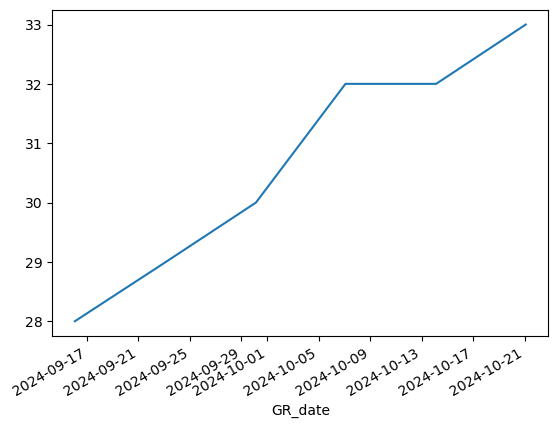

In [59]:
vyvoj[vyvoj['GR_title'].str.contains('Duše národa',na=False)]['GR_ratings_count'].plot()

<Axes: xlabel='GR_date'>

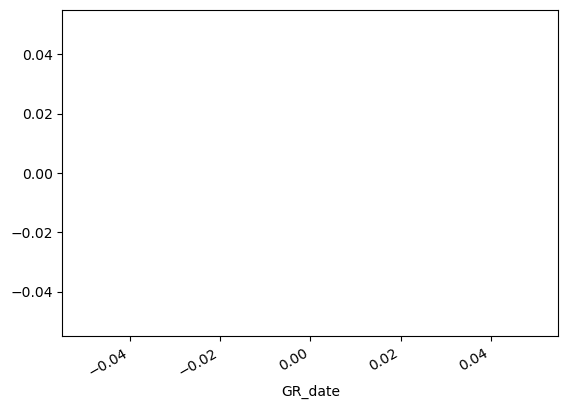

In [60]:
vyvoj[vyvoj['GR_title'].str.contains('Reportér',na=False)]['GR_rating'].plot()

<Axes: xlabel='GR_date'>

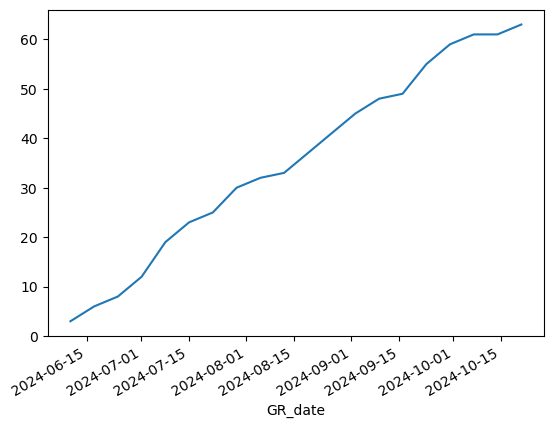

In [61]:
vyvoj[vyvoj['GR_title'].str.contains('Pacanka',na=False)]['GR_ratings_count'].plot()

### Další pokusy

In [63]:
gr['GR_date'] = pd.to_datetime(gr['GR_date'])

In [64]:
tydny = gr.groupby(pd.Grouper(key='GR_date', freq='W'))['GR_ratings_count'].sum()
tydny

GR_date
2024-04-07    36632.0
2024-04-14    24847.0
2024-04-21    12856.0
2024-04-28    12964.0
2024-05-05    13236.0
2024-05-12    13890.0
2024-05-19    14266.0
2024-05-26    14562.0
2024-06-02    14983.0
2024-06-09    15329.0
2024-06-16    15749.0
2024-06-23    16109.0
2024-06-30    16324.0
2024-07-07    16739.0
2024-07-14    17279.0
2024-07-21    18029.0
2024-07-28    18238.0
2024-08-04    18808.0
2024-08-11    19056.0
2024-08-18    19455.0
2024-08-25    20045.0
2024-09-01    20290.0
2024-09-08    20706.0
2024-09-15    20620.0
2024-09-22    20218.0
2024-09-29    23189.0
2024-10-06    28599.0
2024-10-13    29026.0
2024-10-20    29629.0
2024-10-27    29994.0
Freq: W-SUN, Name: GR_ratings_count, dtype: float64

In [65]:
monthly_sum = tydny.resample('M').sum()
monthly_sum

C:\Users\micha\AppData\Local\Temp\ipykernel_22020\2088204097.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum = tydny.resample('M').sum()


GR_date
2024-04-30     87299.0
2024-05-31     55954.0
2024-06-30     78494.0
2024-07-31     70285.0
2024-08-31     77364.0
2024-09-30    105023.0
2024-10-31    117248.0
Freq: ME, Name: GR_ratings_count, dtype: float64

In [66]:
monthly_diff = monthly_sum.diff()
monthly_diff

GR_date
2024-04-30        NaN
2024-05-31   -31345.0
2024-06-30    22540.0
2024-07-31    -8209.0
2024-08-31     7079.0
2024-09-30    27659.0
2024-10-31    12225.0
Freq: ME, Name: GR_ratings_count, dtype: float64

In [67]:
gr

,GR_isbn,GR_date,GR_title,GR_rating,GR_ratings_count,GR_reviews,GR_published,GR_1_stars,GR_2_stars,GR_3_stars,GR_4_stars,GR_5_stars
0,9.788024e+12,2024-04-01 14:11:25,Sochař by Artur Janoušek,2.00,2.0,1.0,"January 1, 2023",NaN,NaN,NaN,NaN,NaN
1,9.788088e+12,2024-04-01 14:11:30,I smutek byl jen sen. Poezie Josefa Kocourka b...,4.00,1.0,0.0,"January 1, 2023",NaN,NaN,NaN,NaN,NaN
2,9.788073e+12,2024-04-01 14:11:34,Hranice zvrhlosti by Jan Urban,3.29,14.0,3.0,"May 15, 2023",NaN,NaN,NaN,NaN,NaN
3,9.788091e+12,2024-04-01 14:11:37,Z pera knihomolů: 11 povídek od českých a slov...,3.86,140.0,29.0,"March 31, 2023",NaN,NaN,NaN,NaN,NaN
4,9.788076e+12,2024-04-01 14:11:43,"Stará béčková legenda (Stará béčková legenda, ...",4.21,19.0,6.0,"April 3, 2023",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
22102,9.788073e+12,2024-10-21 03:57:27,"Tam, kde nejsi by Lenka Sadílková",3.17,6.0,0.0,"March 1, 2023",1.0,0.0,3.0,1.0,1.0
22103,9.788077e+12,2024-10-21 03:57:29,Obchodníci s dětmi by Hana Hindráková,2.67,3.0,0.0,"January 1, 2023",1.0,0.0,1.0,1.0,0.0
22104,9.788072e+12,2024-10-21 03:57:54,Ostří meče by Iveta Svobodová,1.00,2.0,2.0,"January 1, 2024",2.0,0.0,0.0,0.0,0.0
22105,9.788026e+12,2024-10-21 03:57:57,České podsvětí Josefa Klímy by Josef Klíma,4.33,18.0,2.0,"January 1, 2023",0.0,0.0,1.0,10.0,7.0


In [68]:
prvni = gr.groupby('GR_title')['GR_date'].min()
prvni = prvni[prvni < '2024-04-22']
prvni = prvni.index.to_list()

In [69]:
pocitaci_zaklad = gr[~gr['GR_title'].isin(prvni)][['GR_date','GR_title','GR_rating','GR_ratings_count']].sort_values(by='GR_date')
pocitaci_zaklad

,GR_date,GR_title,GR_rating,GR_ratings_count
3372,2024-04-22 02:22:38,Domeček pro panenky by Ivan Wernisch,0.00,0.0
3663,2024-04-29 02:00:07,Boží potměšilost by Zdeněk Řehák,2.00,1.0
3785,2024-04-29 02:08:35,"Velice dlouhé schody (Ota Fink, #9) by Jarosla...",4.33,9.0
3893,2024-04-29 02:21:26,Starý paní mají v ústech porcelán by Monika Ti...,3.00,1.0
3909,2024-04-29 02:22:16,Domeček pro panenky by Ivan Wernisch,5.00,1.0
...,...,...,...,...
22094,2024-10-21 03:54:28,"Bez dechu (Projekt Alfa, #3) by Lenka Dostálová",3.78,9.0
22095,2024-10-21 03:54:30,Ještěrky by Tereza Kopecká,2.86,7.0
22100,2024-10-21 03:57:18,Suzy by Jana Pacáková,3.00,6.0
22101,2024-10-21 03:57:21,Převaděč by Miroslav Petrík,4.00,1.0


In [70]:
pocitaci_zaklad['tydnu'] = pocitaci_zaklad.groupby('GR_title').cumcount() + 1

In [71]:
pocitaci_zaklad.sort_values(by="tydnu")

,GR_date,GR_title,GR_rating,GR_ratings_count,tydnu
3372,2024-04-22 02:22:38,Domeček pro panenky by Ivan Wernisch,0.00,0.0,1
18975,2024-09-30 03:23:00,Dlouhý most by Antonín Pelíšek,3.67,3.0,1
18974,2024-09-30 03:22:55,Mína a náhodní kolemjdoucí by Kateřina Pantovič,4.44,9.0,1
18973,2024-09-30 03:22:49,Honý a já: příběh lásky by Marie Chválová,3.00,1.0,1
18970,2024-09-30 03:22:38,Kronika lesa - případ ztracených ježků by Mart...,4.25,4.0,1
...,...,...,...,...,...
21695,2024-10-21 02:26:51,Psychologie pro každý den aneb Co nás ve škole...,0.00,0.0,26
21984,2024-10-21 03:27:45,Boží potměšilost by Zdeněk Řehák,2.00,1.0,26
21753,2024-10-21 02:36:41,"Velice dlouhé schody (Ota Fink, #9) by Jarosla...",4.33,15.0,26
22042,2024-10-21 03:38:59,Starý paní mají v ústech porcelán by Monika Ti...,3.00,2.0,26


<Axes: xlabel='tydnu'>

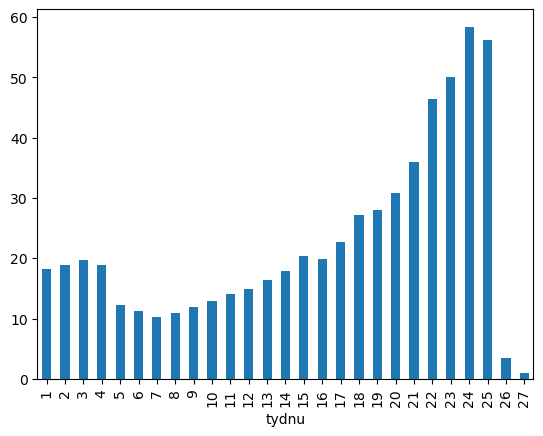

In [72]:
pocitaci_zaklad.groupby('tydnu')['GR_ratings_count'].mean().plot.bar()

<Axes: xlabel='tydnu'>

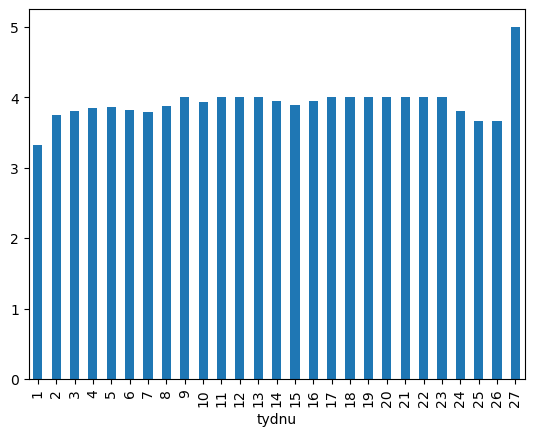

In [73]:
pocitaci_zaklad.groupby('tydnu')['GR_rating'].median().plot.bar()

In [74]:
import matplotlib.pyplot as plt


<Axes: title={'center': 'GR_ratings_count'}, xlabel='tydnu'>

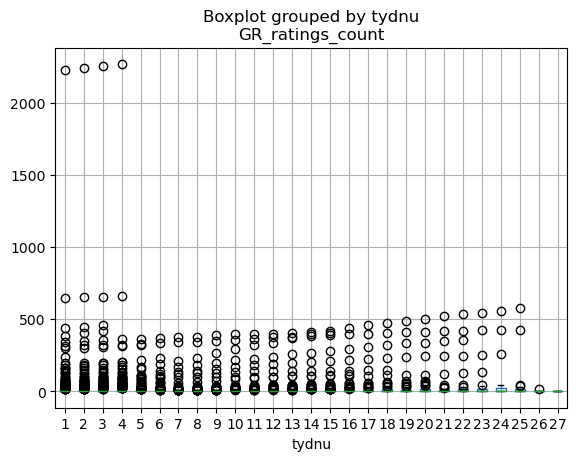

In [75]:
pocitaci_zaklad.boxplot(column='GR_ratings_count', by='tydnu')

## Databáze knih

In [77]:
x = pd.read_json(os.path.join("data","martinus_vyslo.json"))

In [78]:
x

,M_titul,M_autorstvo,M_anotace,M_podtitul,M_tagy,M_originální_název,M_počet_stran,M_vazba,M_isbn,M_předběžné_datum_vydání,...,M_účel_knihy,M_styl,M_ilustrace,M_věkové_doporučení,M_překlad,M_ostatní,M_příloha,M_jazyková_úroveň,M_editoři,M_knižní_předloha
0,Pán prasat\n Novinka,Irena Mondeková,Povídková kniha Pán prasat zvítězila v literár...,None,"[satira, příroda]",Pán prasat,160.0,brožovaná vazba,9788076291317,NaN,...,None,"[filozofický, humorný, psychologický]",None,NaN,None,None,None,None,None,None
1,Nadechni se potřetí...\n Novinka,Dagmar Digma Čechová,Mladá Miriam se po vyhrocení situace s manipul...,None,"[minulost, láska, osud, vztahy, tajemství, smr...",Nadechni se potřetí...,280.0,pevná vazba,9788027917419,NaN,...,None,romantický,None,NaN,None,None,None,None,None,None
2,Ukolébavka pro mou maličkou,Veronika Černucká,Informace z pořadu Dávné kauzy způsobí zděšení...,None,"[vražda, thriller, detektivka, vyšetřování]",Ukolébavka pro mou maličkou,304.0,pevná vazba,9788027915675,NaN,...,None,napínavý,None,NaN,None,None,None,None,None,None
3,Dialogy s ozvěnou\n Novinka,Jakub Eden,Dialogy s ozvěnou jsou debutovou sbírkou Jakub...,None,"[dialog, láska, smysl života, dialogy, moudros...",Dialogy s ozvěnou,56.0,brožovaná vazba,9788090926400,NaN,...,None,"[filozofický, lyrický, romantický, duchovní]",None,NaN,None,None,None,None,None,None
4,"Den, kdy se potkali\n Přečtená",Petr Hugo Šlik,Co všechno se dá prožít během jediného dne? Dv...,None,None,None,160.0,pevná vazba s přebalem,None,NaN,...,None,None,None,NaN,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12416,Báječná léta pod psa,Michal Viewegh,Moderní klasika z pera populárního spisovatele...,None,"[20. století, dobová atmosféra, příběh chlapce...",None,264.0,pevná vazba,9788024936802,NaN,...,None,"[filozofický, duchovní, humorný]",None,NaN,None,None,None,None,None,None
12417,Europeana,Patrik Ouředník,Co je pravda? Historická pravda? Literární pra...,Stručné dějiny dvacátého věku,None,None,100.0,pevná vazba,9788072078325,NaN,...,None,None,None,NaN,None,None,None,None,None,None
12418,Zbabělci,Josef Škvorecký,Dnes už kultovní a také světově proslulý román...,None,"[historické události, 1945, autobiografický, d...",None,432.0,pevná vazba,9788073354008,NaN,...,None,historický,None,NaN,None,None,None,None,None,None
12419,Teorie spolehlivosti,Ivan Diviš,Druhé rozšířené vydání. Rozsáhlá kniha krátkýc...,Texty z let 1960/1999,None,None,712.0,pevná vazba,8072151614,NaN,...,None,None,None,NaN,None,None,None,None,None,None


In [79]:
dk = pd.read_csv(os.path.join("data","databazeknih-hodnoceni.csv"))

In [80]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'DK_autorstvo'],
      dtype='object')

In [81]:
dk[dk['DK_titul'].str.contains('Válka s')]['DK_isbn'].to_list()

[9788074973178.0, 9788074973178.0, 9788074973178.0, 9788074973178.0]

In [82]:
    month_ago = pd.to_datetime(gr['GR_date'].max()) - datetime.timedelta(days=29)


In [83]:
dk['skore'] = dk['DK_Chystám_se_číst'] + dk['DK_Přečtených']
dk['skore']

0         48.0
1        610.0
2         52.0
3        229.0
4         51.0
         ...  
46935    113.0
46936    349.0
46937      NaN
46938      2.0
46939      4.0
Name: skore, Length: 46940, dtype: float64

In [84]:
dk.sample(10)

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_dalších_seznamech,DK_Doporučených,DK_autorstvo,skore
18487,9.788028e+12,2024-06-24 03:21:11,Tajemství domu v L.,94.0,28.0,"['Pro ženy', 'Literatura česká', 'tajemství']",2.0,33.0,NaN,62.0,65.0,14.0,1.0,1.0,NaN,98.0
14102,9.788076e+12,2024-06-03 03:13:14,Svědectví letových zápisníků,60.0,2.0,"['Literatura faktu', 'Historie', 'Vojenství']",NaN,2.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN
20911,9.788091e+12,2024-07-08 03:32:48,Karel,87.0,3.0,"['Literatura česká', 'Biografie a memoáry', 'H...",NaN,3.0,NaN,3.0,2.0,1.0,NaN,NaN,NaN,5.0
36776,9.788088e+12,2024-09-23 03:32:22,Micro:bit krok za krokem,80.0,1.0,['PC literatura'],2.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,2.0
27648,9.788028e+12,2024-08-12 03:41:50,Příběhy filmových fotografií,100.0,5.0,"['Literatura česká', 'Obrazové publikace', 'Hi...",NaN,6.0,NaN,3.0,7.0,4.0,NaN,NaN,NaN,13.0
30879,9.788027e+12,2024-08-26 03:40:09,Rusko,69.0,21.0,"['Literatura naučná', 'Historie', 'Politologie...",NaN,22.0,2.0,12.0,10.0,4.0,2.0,2.0,NaN,32.0
1507,9.788074e+12,2024-04-02 10:33:16,Dům U Orobinců,83.0,8.0,[],1.0,6.0,NaN,3.0,2.0,NaN,NaN,NaN,NaN,8.0
19806,9.788089e+12,2024-07-01 03:25:47,Polibek Choroby,80.0,34.0,"['Literatura česká', 'Sci-fi']",NaN,34.0,4.0,15.0,30.0,19.0,NaN,5.0,NaN,64.0
6880,9.788025e+12,2024-04-22 03:27:51,Rozinky v blátě,78.0,13.0,"['Židé', 'Praha', 'antisemitismus', 'dospívání...",NaN,20.0,6.0,43.0,48.0,13.0,1.0,1.0,NaN,68.0
9579,9.788074e+12,2024-05-06 09:57:01,Epocha žárovky,57.0,6.0,"['Literatura česká', 'Poezie']",NaN,6.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
gr['GR_title'].nunique()

1073

In [86]:
dk['DK_titul'].nunique()

2339

In [87]:
dk

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_dalších_seznamech,DK_Doporučených,DK_autorstvo,skore
0,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,78.0,18.0,['české romány'],NaN,19.0,NaN,46.0,29.0,6.0,NaN,NaN,NaN,48.0
1,9.788021e+12,2024-04-01 14:39:24,Oprátka za osm mrtvých,88.0,301.0,"['ženy', 'psychiatrické léčebny', 'Českosloven...",3.0,400.0,56.0,150.0,210.0,60.0,9.0,22.0,NaN,610.0
2,9.788072e+12,2024-04-01 14:39:25,Golem,82.0,26.0,"['golem', 'Rabi Löw']",NaN,34.0,4.0,28.0,18.0,3.0,NaN,3.0,NaN,52.0
3,9.788076e+12,2024-04-01 14:39:26,Proč všichni odcházejí,91.0,50.0,['autobiografické prvky'],2.0,59.0,1.0,13.0,170.0,45.0,NaN,5.0,NaN,229.0
4,9.788024e+12,2024-04-01 14:39:27,Sochař,81.0,19.0,[],1.0,28.0,2.0,46.0,23.0,7.0,1.0,1.0,NaN,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46935,9.788026e+12,2024-10-21 04:18:11,České podsvětí Josefa Klímy,84.0,49.0,"['Detektivky, krimi', 'Literatura faktu', 'Žur...",NaN,69.0,15.0,60.0,44.0,9.0,NaN,NaN,['Josef Klíma'],113.0
46936,9.788075e+12,2024-10-21 04:18:12,Kde končí nebe,90.0,186.0,"['Romány', 'Pro ženy', 'Literatura česká']",1.0,202.0,8.0,95.0,147.0,45.0,1.0,24.0,['Petra Lejsková-Langová'],349.0
46937,9.788090e+12,2024-10-21 04:18:12,Magus,0.0,1.0,"['Literatura slovenská', 'Poezie']",NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,['Kamil Zbruž'],NaN
46938,9.788027e+12,2024-10-21 04:18:13,Deník z budoucnosti,60.0,1.0,"['Dobrodružné', 'Literatura česká', 'Pro děti ...",NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,['Markéta Tomková'],2.0


In [88]:
len(dk)

46940

In [89]:
len(dk.drop_duplicates())

46940

In [90]:
dk['DK_date'].max()

'2024-10-21 04:18:14'

In [91]:
dk['DK_date'] = pd.to_datetime(dk['DK_date'])

In [92]:
novinky

['Tajný život Franze Kafky by Martin Petiška',
 'Cínový vojáček by Josef Šorm',
 'Jak vychovat chlapce by Veronika Kořínková',
 'Hudba srdce by Karel Veselý',
 'Aristokratka v Československu by Evžen Boček',
 'Jako po drátku by Ondřej Šanc',
 'Narcis a pivoňka by Katarína Brányiková',
 'Vesnická obec na Moravě mezi osvícenstvím a zrušením poddanství na příkladu privátních statků olomoucké kapituly by Martin Drozda',
 'Neviditelný muž by Bianca Bellová',
 'Žabí deník by Kristýna Hartigová']

In [93]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'DK_autorstvo', 'skore'],
      dtype='object')

In [94]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'DK_autorstvo', 'skore'],
      dtype='object')

In [95]:
dk_nove = dk[dk['DK_date'] < '2024-04-22']['DK_titul'].drop_duplicates().to_list()
dk_nove = dk[~dk['DK_titul'].isin(dk_nove)]

In [96]:
pocitame_dk = dk_nove[['DK_titul','DK_date','DK_rating','DK_ratings_count','DK_Chystám_se_číst']]

In [97]:
pocitame_dk['tydnu'] = pocitame_dk.groupby('DK_titul').cumcount() + 1

C:\Users\micha\AppData\Local\Temp\ipykernel_22020\4289471237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pocitame_dk['tydnu'] = pocitame_dk.groupby('DK_titul').cumcount() + 1


<Axes: xlabel='tydnu'>

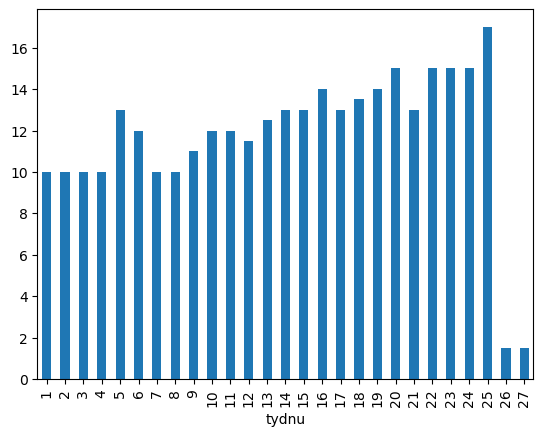

In [98]:
pocitame_dk.groupby('tydnu')['DK_Chystám_se_číst'].median().plot.bar()

<Axes: xlabel='tydnu'>

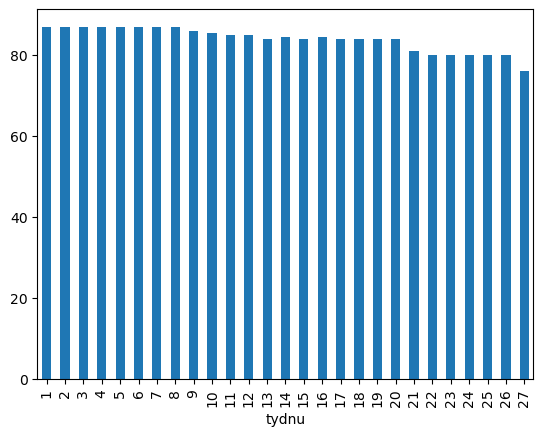

In [99]:
pocitame_dk.groupby('tydnu')['DK_rating'].median().plot.bar()

In [100]:
gr['autorstvo'] = gr['GR_title'].apply(lambda x: x.split(' by ')[1].strip())

In [101]:
gr['autorstvo']

0         Artur Janoušek
1         Josef Kocourek
2             Jan  Urban
3         Eliška Hronová
4         Shigor Birdman
              ...       
22102    Lenka Sadílková
22103    Hana Hindráková
22104    Iveta Svobodová
22105        Josef Klíma
22106        Kamil Zbruž
Name: autorstvo, Length: 22107, dtype: object

In [102]:
import numpy as np

In [103]:
df = pd.read_json(os.path.join("data","martinus_vyslo.json"))

In [104]:
df['isbn'] = df['M_isbn'].astype(str).apply(lambda x: x.replace(".0",""))
dk['isbn'] = dk['DK_isbn'].astype(str).apply(lambda x: x.replace(".0",""))

In [105]:
df

,M_titul,M_autorstvo,M_anotace,M_podtitul,M_tagy,M_originální_název,M_počet_stran,M_vazba,M_isbn,M_předběžné_datum_vydání,...,M_styl,M_ilustrace,M_věkové_doporučení,M_překlad,M_ostatní,M_příloha,M_jazyková_úroveň,M_editoři,M_knižní_předloha,isbn
0,Pán prasat\n Novinka,Irena Mondeková,Povídková kniha Pán prasat zvítězila v literár...,None,"[satira, příroda]",Pán prasat,160.0,brožovaná vazba,9788076291317,NaN,...,"[filozofický, humorný, psychologický]",None,NaN,None,None,None,None,None,None,9788076291317
1,Nadechni se potřetí...\n Novinka,Dagmar Digma Čechová,Mladá Miriam se po vyhrocení situace s manipul...,None,"[minulost, láska, osud, vztahy, tajemství, smr...",Nadechni se potřetí...,280.0,pevná vazba,9788027917419,NaN,...,romantický,None,NaN,None,None,None,None,None,None,9788027917419
2,Ukolébavka pro mou maličkou,Veronika Černucká,Informace z pořadu Dávné kauzy způsobí zděšení...,None,"[vražda, thriller, detektivka, vyšetřování]",Ukolébavka pro mou maličkou,304.0,pevná vazba,9788027915675,NaN,...,napínavý,None,NaN,None,None,None,None,None,None,9788027915675
3,Dialogy s ozvěnou\n Novinka,Jakub Eden,Dialogy s ozvěnou jsou debutovou sbírkou Jakub...,None,"[dialog, láska, smysl života, dialogy, moudros...",Dialogy s ozvěnou,56.0,brožovaná vazba,9788090926400,NaN,...,"[filozofický, lyrický, romantický, duchovní]",None,NaN,None,None,None,None,None,None,9788090926400
4,"Den, kdy se potkali\n Přečtená",Petr Hugo Šlik,Co všechno se dá prožít během jediného dne? Dv...,None,None,None,160.0,pevná vazba s přebalem,None,NaN,...,None,None,NaN,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12416,Báječná léta pod psa,Michal Viewegh,Moderní klasika z pera populárního spisovatele...,None,"[20. století, dobová atmosféra, příběh chlapce...",None,264.0,pevná vazba,9788024936802,NaN,...,"[filozofický, duchovní, humorný]",None,NaN,None,None,None,None,None,None,9788024936802
12417,Europeana,Patrik Ouředník,Co je pravda? Historická pravda? Literární pra...,Stručné dějiny dvacátého věku,None,None,100.0,pevná vazba,9788072078325,NaN,...,None,None,NaN,None,None,None,None,None,None,9788072078325
12418,Zbabělci,Josef Škvorecký,Dnes už kultovní a také světově proslulý román...,None,"[historické události, 1945, autobiografický, d...",None,432.0,pevná vazba,9788073354008,NaN,...,historický,None,NaN,None,None,None,None,None,None,9788073354008
12419,Teorie spolehlivosti,Ivan Diviš,Druhé rozšířené vydání. Rozsáhlá kniha krátkýc...,Texty z let 1960/1999,None,None,712.0,pevná vazba,8072151614,NaN,...,None,None,NaN,None,None,None,None,None,None,8072151614


In [106]:
df['isbn']

0        9788076291317
1        9788027917419
2        9788027915675
3        9788090926400
4                 None
             ...      
12416    9788024936802
12417    9788072078325
12418    9788073354008
12419       8072151614
12420    9788087270516
Name: isbn, Length: 12421, dtype: object

In [107]:
dk['skore'] = dk['DK_Chystám_se_číst'] + dk['DK_Přečtených']

In [108]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'DK_autorstvo', 'skore',
       'isbn'],
      dtype='object')

In [109]:
df.columns

Index(['M_titul', 'M_autorstvo', 'M_anotace', 'M_podtitul', 'M_tagy',
       'M_originální_název', 'M_počet_stran', 'M_vazba', 'M_isbn',
       'M_předběžné_datum_vydání', 'M_edice', 'M_vydání', 'M_jazyk', 'M_původ',
       'M_nakladatel', 'M_pro_koho', 'M_kategorizace', 'M_cena', 'M_obálka',
       'M_ebook', 'M_audiokniha', 'M_datum', 'M_soubor', 'M_rozměr',
       'M_hmotnost', 'M_rok_vydání', 'M_série', 'M_díl', 'M_účel_knihy',
       'M_styl', 'M_ilustrace', 'M_věkové_doporučení', 'M_překlad',
       'M_ostatní', 'M_příloha', 'M_jazyková_úroveň', 'M_editoři',
       'M_knižní_předloha', 'isbn'],
      dtype='object')

### Nejvíce nových hodnocení od dubna '24

In [111]:
def hezky_titul(row):
    try:
        autorstvo = df[df['isbn'] == row['isbn']]['M_autorstvo'].drop_duplicates().to_list()[0]
        return f"""{autorstvo}: {row['DK_titul']}"""
    except:
        return f"""?: {row['DK_titul']}"""

In [112]:
dk['hezky_titul'] = dk.apply(lambda row: hezky_titul(row), axis=1)

In [113]:
pd.Series(dk.groupby("hezky_titul")['DK_ratings_count'].max() - dk.groupby("hezky_titul")['DK_ratings_count'].min()).nlargest(20)

hezky_titul
Karin Lednická: Šikmý kostel 3                  1020.0
Patrik Hartl: Gazely                             610.0
Markéta Lukášková: Odvaha                        563.0
Kristýna Trpková: Někdo z nás                    531.0
Nina Špitálníková: Severka                       477.0
?: U severní zdi                                 413.0
Petra Dvořáková: Pláňata                         330.0
Marek Torčík: Rozložíš paměť                     269.0
Pavlína Křivánková: Chalupa                      262.0
Hana Marie Kornerová: Heřmánkové údolí           242.0
Jakub Stanjura: Srpny                            241.0
Michaela Klevisová: Vraní oko                    231.0
Tereza Bartošová: Klekánice                      226.0
Štěpán Javůrek: Sudetský dům II: Podzim 1947     226.0
Leoš Kyša: Sudetenland                           223.0
Radka Třeštíková: Kde jsi, když nejsi            216.0
Kateřina Surmanová: Tři Sekery                   204.0
Tereza Bartošová Dvořáková: Vodník               198.

In [114]:
#!/usr/bin/env python

import os
import requests
import datetime
import pandas as pd

kam_stahovat = "downloads/aleph"

if not os.path.exists(kam_stahovat):
    os.makedirs(kam_stahovat)

stazene = [s.split('.')[0] for s in os.listdir(kam_stahovat)]

isbns = [i for i in pd.read_json(os.path.join('data','martinus_vyslo.json'))['M_isbn'].to_list() if len(i) == 13]

print(f'{len(isbns)} ISBN ke stažení')

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36"
}

for i in isbns[1000:1005]:
    if i not in stazene:

        try:
            print(f"Stahuji ISBN {i}")
            r = requests.get(f"https://aleph.nkp.cz/F/?func=find-b&find_code=ISN&x=0&y=0&request={i}&filter_code_1=WTP&filter_request_1=&filter_code_2=WLN&adjacent=N", headers=headers, timeout=15)
            r.encoding = r.apparent_encoding
            if "Úplné zobrazení záznamu" in r.text:
                with open(os.path.join(kam_stahovat,f'{i}.html'), "w+", encoding='utf-8') as f:
                    f.write(f"""{r.text}\n\n<!-- {datetime.datetime.now().replace(microsecond=0)} -->""")
        except Exception as E:
            print(E)
            pass
    else:
        print(f"ISBN {i} už staženo")

for filename in os.listdir(kam_stahovat):
    file_path = os.path.join(kam_stahovat, filename)
    if os.path.isfile(file_path) and os.path.getsize(file_path) == 0:
        print(f'Mažu {filename}')
        os.remove(file_path)

12007 ISBN ke stažení
Stahuji ISBN 9788074744051
Stahuji ISBN 9788090651234
Stahuji ISBN 9788088322498
Stahuji ISBN 9788087077528
Stahuji ISBN 9788087979006


In [115]:
dk_stare = dk[dk['DK_date'] < month_ago]['hezky_titul'].drop_duplicates().to_list()
dk_nove = dk[~dk['hezky_titul'].isin(dk_stare)]['hezky_titul'].drop_duplicates().to_list()
dk_nove

['?: Koutnice',
 '?: Msta v Riu',
 '?: Vítek, křupadlo a kostižrout',
 '?: Trojí tajemství modré krve',
 'Adéla Víta: Sněhová bouře',
 '?: Šel dědeček na kopeček',
 '?: Čtveřice trampských pohádek a ještě jedna navíc',
 '?: Pátá minuta je o nás',
 '?: Zvířátka v lese',
 '?: Les',
 '?: Arboriáni v temných časech',
 'Lucie Hlavinková: Apatykář',
 '?: Pohádková expedice',
 '?: V Královských zahradách',
 '?: Strašidelné Brno',
 '?: Otočená Otylka',
 '?: Dvě sovy v nízkém letu',
 'Jiří Krhut: Krhutoviny',
 'Aneta Christovová: Deník tlustý kočičandy',
 '?: Bobík: Pes je přece taky člověk',
 '?: Tajemství Strže strachu: Příběh jednoho skautského oddílu',
 '?: Do neznáma',
 '?: Dopisy jen do Vídně',
 '?: Vysněný pejsek',
 '?: Kouzelná třída v knihovně',
 '?: Královna všech příště',
 '?: Prázdninový příběh pejska a kočičky',
 '?: Papuchalk Isgrín',
 '?: Pohádky z 1. nástupiště',
 '?: Čistič',
 '?: Šaman',
 '?: Barvy empatie',
 "['Pavel Fritz', 'Žaneta Kortusová (ilustrátor!']: Přístav u řeky St

In [116]:
dk_mesic_celkem = pd.Series(dk.groupby("hezky_titul")['skore'].max() - dk[dk['DK_date'] > month_ago].groupby("hezky_titul")['skore'].min()).sort_values(ascending=False)
dk_mesic_celkem.nlargest(30)

hezky_titul
Karin Lednická: Šikmý kostel 3                  185.0
Petra Klabouchová: Ignis fatuus                 139.0
Markéta Lukášková: Odvaha                       113.0
?: Les                                          102.0
Nina Špitálníková: Severka                       73.0
?: Les v domě                                    73.0
Patrik Hartl: Gazely                             68.0
Petra Dvořáková: Pláňata                         66.0
Tereza Boučková: Dům v Matoušově ulici           63.0
Kateřina Surmanová: Tři Sekery                   59.0
Kristýna Trpková: Někdo z nás                    59.0
?: Tahle kniha ti změní život                    58.0
Petra Štarková: Dej mi pokoj                     54.0
František Kotleta: Černá luna                    52.0
Marek Torčík: Rozložíš paměť                     49.0
?: Přechodné období                              48.0
Tereza Bartošová: Klekánice                      46.0
Hana Marie Kornerová: Heřmánkové údolí           44.0
Michaela Duffkov

In [117]:
def nakladatelstvi(isbn):
    try:
        return df[df['isbn'] == isbn]['M_nakladatel'].drop_duplicates().to_list()[0]
    except:
        return None

In [118]:
dk['nakladatel'] = dk['isbn'].apply(lambda x: nakladatelstvi(x))

In [119]:
dk['nakladatel'].sample(20)

43847                                    BIZBOOKS
7559                                        Leges
1430                                  Naše vojsko
28372                                  Golden Dog
31672                                        Host
31924                                        Host
11580                                         Zeď
40444                                       Grada
18569                                Mladá fronta
23429                                       Tváře
30378    Centrum pro studium demokracie a kultury
1098                                         Jota
31942                                    Academia
31604                                   Universum
45551                                        Jota
3408                                 Větrné mlýny
10720                           CZECH NEWS CENTER
19108                              Talent Pro ART
11557                                        1400
40659                                        1400


In [120]:
dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel','skore'])['DK_date'].first()

hezky_titul                                              nakladatel     skore
Adam Kašpar: Adam Kašpar                                 Books & Pipes  2.0     2024-09-23 03:37:10
Adam Táborský: Terapie mezi stromy                       Portál         24.0    2024-09-23 03:39:01
Adriana Krnáčová: Nemesis: Temné město                   Kalibr         17.0    2024-09-30 03:48:40
                                                                        19.0    2024-10-07 03:30:23
                                                                        20.0    2024-10-21 04:05:06
                                                                                        ...        
Šárka Przewozná: Skutečná                                Vendeta        42.0    2024-09-23 03:38:22
                                                                        47.0    2024-10-07 03:28:25
                                                                        48.0    2024-10-21 04:01:59
Žaneta Neužilová: Do s

In [121]:
dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()

hezky_titul                                              nakladatel   
Adam Kašpar: Adam Kašpar                                 Books & Pipes      2.0
Adam Táborský: Terapie mezi stromy                       Portál            24.0
Adriana Krnáčová: Nemesis: Temné město                   Kalibr            17.0
Adéla Chrástecká: Všechno, co jsem zapomněla             Pointa            41.0
Adéla Knapová: Zbabělé zápisky z ukrajinské války        Fra               30.0
                                                                          ...  
Šárka Andrlová: Tajemství domu v L.                      Moba             155.0
Šárka Hieková: Léto na zámku                             Moba              51.0
Šárka Hieková: Možná už zítra                            Moba             156.0
Šárka Przewozná: Skutečná                                Vendeta           42.0
Žaneta Neužilová: Do skonání věků 2: A jak to bylo dál?  Pointa            11.0
Name: skore, Length: 1694, dtype: float64

In [122]:
pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min())

,,skore
hezky_titul,nakladatel,
Adam Kašpar: Adam Kašpar,Books & Pipes,0.0
Adam Táborský: Terapie mezi stromy,Portál,0.0
Adriana Krnáčová: Nemesis: Temné město,Kalibr,3.0
"Adéla Chrástecká: Všechno, co jsem zapomněla",Pointa,1.0
Adéla Knapová: Zbabělé zápisky z ukrajinské války,Fra,2.0
...,...,...
Šárka Andrlová: Tajemství domu v L.,Moba,9.0
Šárka Hieková: Léto na zámku,Moba,10.0
Šárka Hieková: Možná už zítra,Moba,2.0


In [123]:
pribytek = pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()).groupby('nakladatel').sum().reset_index().sum().iloc[1]

In [124]:
nakladatelstvo = pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()).groupby('nakladatel').sum().reset_index()
nakladatelstvo['podil'] = nakladatelstvo['skore'] / pribytek
nakladatelstvo = nakladatelstvo[nakladatelstvo['podil'] >= 0.01]
nakladatelstvo['podil'] = nakladatelstvo['podil'].apply(lambda x: f"""{round(x * 100, 1)} %""".replace(".", ","))
nakladatelstvo = nakladatelstvo.sort_values(by='skore',ascending=False)
nakladatelstvo = nakladatelstvo.drop(columns=['skore'])
nakladatelstvo

,nakladatel,podil
200,Motto,"12,0 %"
197,Moba,"9,3 %"
127,Host,"8,4 %"
130,Ikar CZ,"4,9 %"
143,Kalibr,"4,8 %"
89,Epocha,"4,2 %"
47,Bílá vrána,"3,7 %"
21,Argo,"2,9 %"
208,Mystery Press,"2,7 %"
42,Bourdon,"2,3 %"


In [125]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'DK_autorstvo', 'skore',
       'isbn', 'hezky_titul', 'nakladatel'],
      dtype='object')

In [126]:
def koho_vydavaji(n):
    top = dk[dk['nakladatel'] == n].groupby('hezky_titul')['DK_ratings_count'].max().nlargest(10).index.to_list()
    top2 = [x.split(":")[0] for x in top if "[" not in x]
    top2 = list(set(top2))
    kolik = len(top2)
    if kolik >= 3:
        return top2[:3]
    else:
        return top2

In [127]:
for index, row in nakladatelstvo.iterrows():
    stars = koho_vydavaji(row['nakladatel'])
    stars_kratce = [x.split(' ')[-1] for x in stars]
    print(stars_kratce)

['Poncarová', 'Wilková', 'Bartošová']
['Horáková', 'Niedl', 'Vondruška']
['Dvořáková', 'Stanjura', 'Šesták']
['Nesvadbová', 'Viewegh', 'Skočílková']
['Trpková', 'Urban', 'Goffa']
['Kotleta', 'Bureš', 'Sněgoňová']
['Lednická']
['Konáš', 'Štoflová', 'Hůlová']
['Rejfová', 'Mařík', 'Birdman']
['Kalenda', 'Hartl', 'Chalupníková']
['Kašpárek', 'Váchal', 'Nováková']
['Hamáková', 'Langová', 'Minářová']
['Vlasáková', 'Ambrožová', 'Huškova']
['Kotleta', 'Hlavničková', 'Sacká']
['Václavíková', 'Záleský', 'Meixnerová']
['Bínová', 'Boučková', 'Lundiaková']
['Vaňura', 'Macek', 'Hofmanová']
['Špitálníková']
['Kočová', 'Štraubová', 'Rosípalová']
['Čapka', 'Eckhardtová', 'Šorm']
['Skácel', 'Štifter', 'Honzák']
['Piloušková', 'Przewozná', 'Sládečková']
['Lepeška', 'Bartošová', 'Welsch']
['Vojáček', 'Bechynková', 'Boučková']
['Jell', 'Sky', 'Peas']
['Kubů', 'Hubková', 'Hrabal']


In [128]:
dk[dk['DK_date'] > month_ago].groupby(['nakladatel','hezky_titul'])['skore'].max().nlargest(20)

nakladatel    hezky_titul                                                  
Bourdon       Patrik Hartl: Okamžiky štěstí                                    8881.0
Moba          Hana Marie Kornerová: Heřmánkové údolí                           7274.0
Triáda        Anne Franková: Zadní dům: Deník                                  7169.0
Mladá fronta  Bohumil Hrabal: Obsluhoval jsem anglického krále                 3580.0
Bourdon       Patrik Hartl: Gazely                                             3007.0
Kniha Zlín    Hynek Čapka: Neviditelné kořeny                                  2993.0
1400          Jaroslav Hašek: Osudy dobrého vojáka Švejka za světové války     2476.0
Odeon CZ      ['Jaroslav Hašek', 'Josef Lada']: Osudy dobrého vojáka Švejka    2476.0
Motto         Jana Poncarová: Podbrdské ženy                                   2379.0
              Michaela Klevisová: Vraní oko                                    2222.0
Bílá vrána    Karin Lednická: Šikmý kostel 3                    

In [129]:
dk[dk['hezky_titul'].str.contains('Prchal')]

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_dalších_seznamech,DK_Doporučených,DK_autorstvo,skore,isbn,hezky_titul,nakladatel


In [130]:
koho_vydavaji('Listen')

['Klára Vlasáková', 'Dorota Ambrožová', 'Lucie Huškova']

In [131]:
for index, row in nakladatelstvo.iterrows():
    stars = koho_vydavaji(row['nakladatel'])
    print(', '.join(stars))

Jana Poncarová, Scarlett Wilková, Tereza Bartošová
Naďa Horáková, František Niedl, Vlastimil Vondruška
Petra Dvořáková, Jakub Stanjura, Petr Šesták
Barbara Nesvadbová, Michal Viewegh, Mirka Skočílková
Kristýna Trpková, David Urban, Martin Goffa
František Kotleta, Roman Bureš, Kristýna Sněgoňová
Karin Lednická
Jaroslav Konáš, Danka Štoflová, Petra Hůlová
Marie Rejfová, Jakub Mařík, Shigor Birdman
František Kalenda, Patrik Hartl, Kateřina Chalupníková
Michal Kašpárek, Josef Váchal, Tereza Nováková
Marie Hamáková, Petra Langová, Elena Minářová
Klára Vlasáková, Dorota Ambrožová, Lucie Huškova
František Kotleta, Lenka Hlavničková, Vlaďka Sacká
Eliška Václavíková, Vojtěch Záleský, Karolína Zoe Meixnerová
Tereza Bínová, Tereza Boučková, Hana Lundiaková
Miroslav Vaňura, Miroslav Macek, Jiřina Hofmanová
Nina Špitálníková
Anežka Kočová, Alena Štraubová, Adéla Rosípalová
Hynek Čapka, Nora Eckhardtová, Josef Šorm
Jan Skácel, Jan Štifter, Radkin Honzák
Irena Piloušková, Šárka Przewozná, Kristýna Sl

In [132]:
nakladatelstvo

,nakladatel,podil
200,Motto,"12,0 %"
197,Moba,"9,3 %"
127,Host,"8,4 %"
130,Ikar CZ,"4,9 %"
143,Kalibr,"4,8 %"
89,Epocha,"4,2 %"
47,Bílá vrána,"3,7 %"
21,Argo,"2,9 %"
208,Mystery Press,"2,7 %"
42,Bourdon,"2,3 %"


In [133]:
dk_mesic_nakladatele = pd.Series(dk[dk['DK_date'] > week_ago].groupby("nakladatel")['skore'].sum() - dk[dk['DK_date'] > month_ago].groupby("nakladatel")['skore'].sum()).sort_values(ascending=False)
dk_mesic_nakladatele.nlargest(30)

nakladatel
Národní galerie v Praze     0.0
Návrat domů                 0.0
Muzeum paměti XX.století    0.0
X2015                       0.0
Drnka, o.s.                 0.0
Dona                        0.0
Wolters Kluwer ČR           0.0
Nová vlna                   0.0
Detour Productions          0.0
Národní filmový archiv      0.0
Computer Media              0.0
Wolters Kluwer              0.0
Muza books                  0.0
VŠCHT Praha                 0.0
Paulínky                    0.0
Casablanca                  0.0
Carpe diem                  0.0
Península                   0.0
Permakultura                0.0
Perplex                     0.0
Pokáč                       0.0
C. H. Beck SK               0.0
Muzeum Karlova mostu        0.0
Ergo Brauner                0.0
Poznání                     0.0
MarieTum                    0.0
Kant                        0.0
Jakab                       0.0
eSport.cz                   0.0
Knihy s úsměvem             0.0
Name: skore, dtype: float64

In [134]:
dk_mesic_novinky = pd.Series(dk[~dk['hezky_titul'].isin(dk_stare)].groupby("hezky_titul")['skore'].max() - dk[(~dk['hezky_titul'].isin(dk_stare)) & (dk['DK_date'] > month_ago)].groupby("hezky_titul")['skore'].min()).sort_values(ascending=False)
dk_mesic_novinky = dk_mesic_novinky[dk_mesic_novinky >= 10]
dk_mesic_novinky

hezky_titul
?: Les                                                                  102.0
?: Les v domě                                                            73.0
Tereza Boučková: Dům v Matoušově ulici                                   63.0
?: Tahle kniha ti změní život                                            58.0
Petra Štarková: Dej mi pokoj                                             54.0
?: Přechodné období                                                      48.0
Hynek Čapka: Neviditelné kořeny                                          43.0
Tereza Bartošová: Dceřina kletba                                         36.0
?: Desetkrát a dost                                                      32.0
?: Osud v mlze                                                           30.0
Lucie Hlavinková: Svátek hada                                            27.0
Scarlett Wilková: Ty chladné oči                                         26.0
?: Chalupa                                          

In [135]:
dk_mesic_ratings = pd.Series(dk.groupby("hezky_titul")['DK_ratings_count'].max() - dk[dk['DK_date'] > month_ago].groupby("hezky_titul")['DK_ratings_count'].min()).sort_values(ascending=False)
dk_mesic_ratings = dk_mesic_ratings[dk_mesic_ratings >= 25]
dk_mesic_ratings

hezky_titul
Karin Lednická: Šikmý kostel 3             140.0
Petra Klabouchová: Ignis fatuus            109.0
?: Les                                      88.0
Markéta Lukášková: Odvaha                   76.0
?: Les v domě                               49.0
Kateřina Surmanová: Tři Sekery              46.0
Petra Dvořáková: Pláňata                    46.0
Patrik Hartl: Gazely                        44.0
Kristýna Trpková: Někdo z nás               43.0
Nina Špitálníková: Severka                  38.0
František Kotleta: Černá luna               37.0
Petra Štarková: Dej mi pokoj                33.0
Tereza Bartošová: Klekánice                 33.0
Hana Marie Kornerová: Heřmánkové údolí      32.0
?: Přechodné období                         31.0
Tereza Bartošová: Dceřina kletba            30.0
Tereza Bartošová Dvořáková: Vodník          28.0
Vlastimil Vondruška: Nevěsta Kristova       28.0
Marek Torčík: Rozložíš paměť                28.0
?: U severní zdi                            27.0
Michaela

In [136]:
dk_mesic_chystam = pd.Series(dk.groupby("hezky_titul")['DK_Chystám_se_číst'].max() - dk[dk['DK_date'] > month_ago].groupby("hezky_titul")['DK_Chystám_se_číst'].min()).sort_values(ascending=False)
dk_mesic_chystam = dk_mesic_chystam[dk_mesic_chystam >= 10]
dk_mesic_chystam

hezky_titul
Tereza Boučková: Dům v Matoušově ulici                          38.0
?: Tahle kniha ti změní život                                   35.0
Patrik Hartl: Gazely                                            31.0
?: Osud v mlze                                                  29.0
?: Les                                                          23.0
Petra Štarková: Dej mi pokoj                                    17.0
Lenka Petřeková: Kde se skrývá temnota                          16.0
Kateřina Karolová: Jiné místo                                   16.0
Nina Špitálníková: Severka                                      16.0
Kateřina Surmanová: Tři Sekery                                  15.0
Markéta Lukášková: Odvaha                                       15.0
Bianca Bellová: Neviditelný muž                                 14.0
Marek Torčík: Rozložíš paměť                                    14.0
Miroslav Hlaučo: Letnice                                        13.0
?: Než si pro mě přijd

### Co se lidé nejvíce chystají číst v posledním týdnu

In [138]:
dk_tyden_chystam = pd.Series(dk.groupby("hezky_titul")['DK_Chystám_se_číst'].max() - dk[dk['DK_date'] > week_ago].groupby("hezky_titul")['DK_Chystám_se_číst'].min()).sort_values(ascending=False)
dk_tyden_chystam = dk_tyden_chystam[dk_tyden_chystam >= 5]
dk_tyden_chystam

hezky_titul
Patrik Hartl: Gazely                                  29.0
?: Les                                                23.0
Kateřina Karolová: Jiné místo                         14.0
Karin Lednická: Šikmý kostel 3                        11.0
Halina Pawlowská: Rande                               10.0
Pavel Kolář: Řeka pod hladinou: Vědomím proti času     9.0
Nika Peas: Chráním Tě                                  9.0
Renáta Navrátilová: Můj sexy šéf                       9.0
Jakub Hoza: Sochaři masa                               8.0
Lucie Srňánková: Ano, pane Božský                      8.0
M.K. Hardy: Tanec za odpuštění                         8.0
Anežka Kočová: Trnitá kletba                           7.0
Kateřina Pantovič: Josefíně všichni lžou               7.0
Alex Walló: Muž vdaných žen                            7.0
Tereza Bartošová: Dceřina kletba                       7.0
Aňa Geislerová: Co tě nezabije                         7.0
Soňa Paleta: Pražačka na vsi                

### Hot novinky

In [140]:
uz_byly = dk[dk['DK_date'] < week_ago]['hezky_titul'].drop_duplicates().to_list()
dk_novinky_chystam = dk[~dk['hezky_titul'].isin(uz_byly)].groupby('hezky_titul')['DK_Chystám_se_číst'].max().sort_values(ascending = False)
dk_novinky_chystam = dk_novinky_chystam[dk_novinky_chystam >= 5]
dk_novinky_chystam

hezky_titul
?: Povídky z jedné a druhé kapsy          195.0
?: Zahradníkův rok                        119.0
?: Aristokratka v Československu          115.0
Martin Kuška: Až pak můžeme zapomenout      8.0
?: Omrzlina                                 7.0
Name: DK_Chystám_se_číst, dtype: float64

### Nejvíce hodnocené za poslední týden

In [142]:
pd.Series(dk.groupby("DK_titul")['DK_ratings_count'].max() - dk[dk['DK_date'] < week_ago].groupby("DK_titul")['DK_ratings_count'].max()).nlargest(60)

DK_titul
Šikmý kostel 3                    40.0
Ignis fatuus                      24.0
Les v domě                        16.0
Odvaha                            15.0
Gazely                            14.0
Tři Sekery                        13.0
U severní zdi                     12.0
Desetkrát a dost                  11.0
Někdo z nás                       11.0
Pláňata                           11.0
Tahle kniha ti změní život        11.0
Vodník                            10.0
Zápisník alkoholičky              10.0
Neklidná růže                      9.0
Chalupa                            8.0
Dej mi pokoj                       7.0
Lamač                              7.0
Láska ve špičce italské boty       7.0
Nevěsta Kristova                   7.0
Severka                            7.0
Vyhoření                           7.0
Divné děti a smutná kočka          6.0
Heřmánkové údolí                   6.0
Neviditelné kořeny                 6.0
Národní opruzení                   6.0
Rozložíš paměť  

### Nejlépe a nejhůře hodnocené knihy s víc než x hodnoceními

In [144]:
dk[dk['DK_ratings_count'] > 200].groupby("DK_titul")['DK_rating'].max().nlargest(20)

DK_titul
Neviditelné kořeny                                       96.0
U severní zdi                                            95.0
Šikmý kostel 3                                           95.0
Markovič: Lovec přízraků                                 93.0
Zatím dobrý: Mašínovi a největší příběh studené války    93.0
Deník Věrky Kohnové: Jak ráda bych tak zůstala           92.0
Heřmánkové údolí                                         92.0
Jednooký král Václav I.                                  92.0
Království meče                                          92.0
Tajemství Velkého Vonta (sběratelské vydání)             92.0
Čas vlků                                                 92.0
Blues: Blues pro bláznivou holku                         91.0
Na králův příkaz                                         91.0
Návrat nežádoucí                                         91.0
Operace Petragun                                         91.0
Pátá minuta je o nás                                     91.0

In [145]:
vyjde = pd.read_json('data/martinus_vyjde.json')

In [146]:
vyjde.columns

Index(['M_titul', 'M_autorstvo', 'M_anotace', 'M_podtitul', 'M_tagy',
       'M_originální_název', 'M_počet_stran', 'M_vazba', 'M_isbn',
       'M_předběžné_datum_vydání', 'M_edice', 'M_vydání', 'M_jazyk', 'M_původ',
       'M_nakladatel', 'M_pro_koho', 'M_kategorizace', 'M_cena', 'M_obálka',
       'M_ebook', 'M_audiokniha', 'M_datum', 'M_soubor', 'M_rozměr',
       'M_hmotnost', 'M_rok_vydání', 'M_série', 'M_díl', 'M_účel_knihy',
       'M_styl', 'M_ilustrace', 'M_věkové_doporučení', 'M_překlad',
       'M_ostatní', 'M_příloha', 'M_jazyková_úroveň', 'M_editoři',
       'M_knižní_předloha'],
      dtype='object')

In [147]:
dk[dk['DK_ratings_count'] > 50].groupby("DK_titul")['DK_rating'].max().nsmallest(50)

DK_titul
Bestiář                                  49.0
Pralinky                                 49.0
Sauronova nevěsta                        54.0
Srdce v plamenech                        58.0
Malý Gatsby a Carmen z Chodoriva         59.0
Sivá krev                                62.0
Neodpovídej                              63.0
Povídky o ženách                         64.0
Les                                      65.0
Smrková Tišina                           65.0
Nejvyšší karta                           66.0
Co se stalo Veronice                     67.0
Dokonalé městečko                        67.0
Povídky o lásce                          67.0
Město v mlze                             68.0
Souboj princů                            68.0
Ženy zločinu                             68.0
Pacanka                                  69.0
Pražačka na vsi                          69.0
Pusťte světlo do tmavého večera          69.0
Spoutej mě                               69.0
V hrůze a krvi zrozeni   

In [148]:
vyvoj2 = dk[['DK_date','DK_titul','DK_Chystám_se_číst']]
vyvoj2['DK_date'] = pd.to_datetime(vyvoj2['DK_date'])
vyvoj2 = vyvoj2.sort_values(by='DK_date')
vyvoj2 = vyvoj2.set_index('DK_date')

C:\Users\micha\AppData\Local\Temp\ipykernel_22020\3366174841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vyvoj2['DK_date'] = pd.to_datetime(vyvoj2['DK_date'])


<Axes: xlabel='DK_date'>

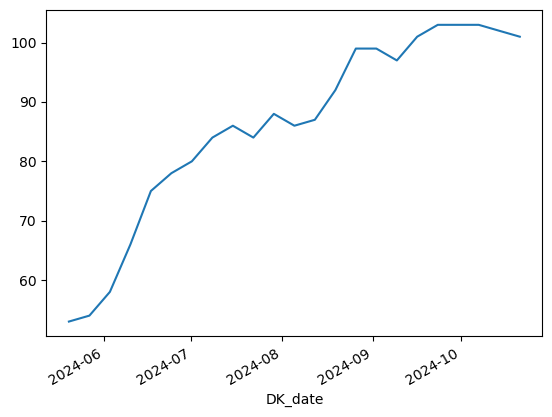

In [149]:
vyvoj2[vyvoj2['DK_titul'] == 'Pacanka']['DK_Chystám_se_číst'].plot()

<Axes: xlabel='DK_date'>

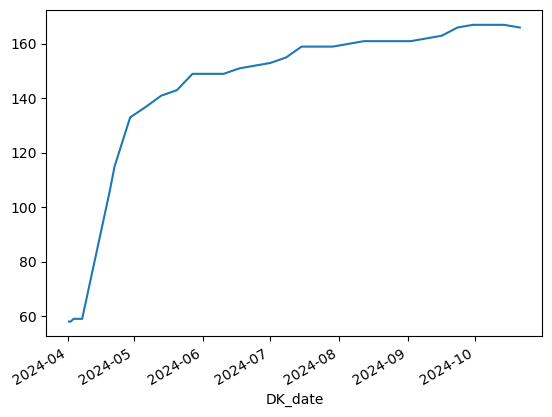

In [150]:
vyvoj2[vyvoj2['DK_titul'] == 'Hella']['DK_Chystám_se_číst'].plot()

## Syntéza (dál už to není zajímavé)

In [152]:
import numpy as np

In [153]:
df = pd.read_json(os.path.join("data","martinus_vyslo.json"))

In [154]:
df

,M_titul,M_autorstvo,M_anotace,M_podtitul,M_tagy,M_originální_název,M_počet_stran,M_vazba,M_isbn,M_předběžné_datum_vydání,...,M_účel_knihy,M_styl,M_ilustrace,M_věkové_doporučení,M_překlad,M_ostatní,M_příloha,M_jazyková_úroveň,M_editoři,M_knižní_předloha
0,Pán prasat\n Novinka,Irena Mondeková,Povídková kniha Pán prasat zvítězila v literár...,None,"[satira, příroda]",Pán prasat,160.0,brožovaná vazba,9788076291317,NaN,...,None,"[filozofický, humorný, psychologický]",None,NaN,None,None,None,None,None,None
1,Nadechni se potřetí...\n Novinka,Dagmar Digma Čechová,Mladá Miriam se po vyhrocení situace s manipul...,None,"[minulost, láska, osud, vztahy, tajemství, smr...",Nadechni se potřetí...,280.0,pevná vazba,9788027917419,NaN,...,None,romantický,None,NaN,None,None,None,None,None,None
2,Ukolébavka pro mou maličkou,Veronika Černucká,Informace z pořadu Dávné kauzy způsobí zděšení...,None,"[vražda, thriller, detektivka, vyšetřování]",Ukolébavka pro mou maličkou,304.0,pevná vazba,9788027915675,NaN,...,None,napínavý,None,NaN,None,None,None,None,None,None
3,Dialogy s ozvěnou\n Novinka,Jakub Eden,Dialogy s ozvěnou jsou debutovou sbírkou Jakub...,None,"[dialog, láska, smysl života, dialogy, moudros...",Dialogy s ozvěnou,56.0,brožovaná vazba,9788090926400,NaN,...,None,"[filozofický, lyrický, romantický, duchovní]",None,NaN,None,None,None,None,None,None
4,"Den, kdy se potkali\n Přečtená",Petr Hugo Šlik,Co všechno se dá prožít během jediného dne? Dv...,None,None,None,160.0,pevná vazba s přebalem,None,NaN,...,None,None,None,NaN,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12416,Báječná léta pod psa,Michal Viewegh,Moderní klasika z pera populárního spisovatele...,None,"[20. století, dobová atmosféra, příběh chlapce...",None,264.0,pevná vazba,9788024936802,NaN,...,None,"[filozofický, duchovní, humorný]",None,NaN,None,None,None,None,None,None
12417,Europeana,Patrik Ouředník,Co je pravda? Historická pravda? Literární pra...,Stručné dějiny dvacátého věku,None,None,100.0,pevná vazba,9788072078325,NaN,...,None,None,None,NaN,None,None,None,None,None,None
12418,Zbabělci,Josef Škvorecký,Dnes už kultovní a také světově proslulý román...,None,"[historické události, 1945, autobiografický, d...",None,432.0,pevná vazba,9788073354008,NaN,...,None,historický,None,NaN,None,None,None,None,None,None
12419,Teorie spolehlivosti,Ivan Diviš,Druhé rozšířené vydání. Rozsáhlá kniha krátkýc...,Texty z let 1960/1999,None,None,712.0,pevná vazba,8072151614,NaN,...,None,None,None,NaN,None,None,None,None,None,None


In [155]:
df['isbn'] = df['M_isbn'].astype(str)

In [156]:
dk['isbn'] = dk['DK_isbn'].astype(str).apply(lambda x: x.replace(".0",""))

In [157]:
gr['isbn'] = gr['GR_isbn'].apply(lambda x: int(x)).astype(str)

In [158]:
dk['isbn']

0        9788027904853
1        9788020615770
2        9788072444748
3        9788076374591
4        9788024289472
             ...      
46935    9788026450009
46936    9788075464613
46937    9788089550944
46938    9788027135776
46939    9788090809185
Name: isbn, Length: 46940, dtype: object

In [159]:
dkm = dk.merge(df, on="isbn", how="inner")

In [160]:
dkm

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,...,M_účel_knihy,M_styl,M_ilustrace,M_věkové_doporučení,M_překlad,M_ostatní,M_příloha,M_jazyková_úroveň,M_editoři,M_knižní_předloha
0,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,78.0,18.0,['české romány'],NaN,19.0,NaN,46.0,...,None,romantický,None,NaN,None,None,None,None,None,None
1,9.788021e+12,2024-04-01 14:39:24,Oprátka za osm mrtvých,88.0,301.0,"['ženy', 'psychiatrické léčebny', 'Českosloven...",3.0,400.0,56.0,150.0,...,None,None,None,NaN,None,None,None,None,None,None
2,9.788072e+12,2024-04-01 14:39:25,Golem,82.0,26.0,"['golem', 'Rabi Löw']",NaN,34.0,4.0,28.0,...,None,historický,None,NaN,None,None,None,None,None,None
3,9.788076e+12,2024-04-01 14:39:26,Proč všichni odcházejí,91.0,50.0,['autobiografické prvky'],2.0,59.0,1.0,13.0,...,None,"[filozofický, duchovní]",None,NaN,None,None,None,None,None,None
4,9.788024e+12,2024-04-01 14:39:27,Sochař,81.0,19.0,[],1.0,28.0,2.0,46.0,...,None,napínavý,None,NaN,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44381,9.788072e+12,2024-10-21 04:18:10,Ostří meče,83.0,7.0,"['Detektivky, krimi', 'Literatura česká']",2.0,12.0,NaN,20.0,...,None,napínavý,None,NaN,None,None,None,None,None,None
44382,9.788026e+12,2024-10-21 04:18:11,České podsvětí Josefa Klímy,84.0,49.0,"['Detektivky, krimi', 'Literatura faktu', 'Žur...",NaN,69.0,15.0,60.0,...,None,None,None,14.0,None,None,None,None,None,None
44383,9.788075e+12,2024-10-21 04:18:12,Kde končí nebe,90.0,186.0,"['Romány', 'Pro ženy', 'Literatura česká']",1.0,202.0,8.0,95.0,...,None,None,None,NaN,None,None,None,None,None,None
44384,9.788090e+12,2024-10-21 04:18:12,Magus,0.0,1.0,"['Literatura slovenská', 'Poezie']",NaN,1.0,NaN,1.0,...,None,romantický,None,NaN,None,None,None,None,None,None


In [161]:
dkm = dkm.merge(gr, on="isbn", how="inner")

In [162]:
dkm

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,...,GR_rating,GR_ratings_count,GR_reviews,GR_published,GR_1_stars,GR_2_stars,GR_3_stars,GR_4_stars,GR_5_stars,autorstvo
0,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,78.0,18.0,['české romány'],NaN,19.0,NaN,46.0,...,2.0,1.0,0.0,"January 1, 2023",NaN,NaN,NaN,NaN,NaN,Zdeněk Řehák
1,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,78.0,18.0,['české romány'],NaN,19.0,NaN,46.0,...,2.0,1.0,0.0,"January 1, 2023",NaN,NaN,NaN,NaN,NaN,Zdeněk Řehák
2,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,78.0,18.0,['české romány'],NaN,19.0,NaN,46.0,...,2.0,1.0,0.0,"January 1, 2023",NaN,NaN,NaN,NaN,NaN,Zdeněk Řehák
3,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,78.0,18.0,['české romány'],NaN,19.0,NaN,46.0,...,2.0,1.0,0.0,"January 1, 2023",NaN,NaN,NaN,NaN,NaN,Zdeněk Řehák
4,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,78.0,18.0,['české romány'],NaN,19.0,NaN,46.0,...,2.0,1.0,0.0,"January 1, 2023",NaN,NaN,NaN,NaN,NaN,Zdeněk Řehák
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598739,9.788090e+12,2024-10-21 04:18:12,Magus,0.0,1.0,"['Literatura slovenská', 'Poezie']",NaN,1.0,NaN,1.0,...,1.0,1.0,0.0,"January 1, 2023",1.0,0.0,0.0,0.0,0.0,Kamil Zbruž
598740,9.788090e+12,2024-10-21 04:18:12,Magus,0.0,1.0,"['Literatura slovenská', 'Poezie']",NaN,1.0,NaN,1.0,...,1.0,1.0,0.0,"January 1, 2023",1.0,0.0,0.0,0.0,0.0,Kamil Zbruž
598741,9.788090e+12,2024-10-21 04:18:12,Magus,0.0,1.0,"['Literatura slovenská', 'Poezie']",NaN,1.0,NaN,1.0,...,1.0,1.0,0.0,"January 1, 2023",1.0,0.0,0.0,0.0,0.0,Kamil Zbruž
598742,9.788090e+12,2024-10-21 04:18:12,Magus,0.0,1.0,"['Literatura slovenská', 'Poezie']",NaN,1.0,NaN,1.0,...,1.0,1.0,0.0,"January 1, 2023",1.0,0.0,0.0,0.0,0.0,Kamil Zbruž


In [163]:
dkm.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'DK_autorstvo', 'skore',
       'isbn', 'hezky_titul', 'nakladatel', 'M_titul', 'M_autorstvo',
       'M_anotace', 'M_podtitul', 'M_tagy', 'M_originální_název',
       'M_počet_stran', 'M_vazba', 'M_isbn', 'M_předběžné_datum_vydání',
       'M_edice', 'M_vydání', 'M_jazyk', 'M_původ', 'M_nakladatel',
       'M_pro_koho', 'M_kategorizace', 'M_cena', 'M_obálka', 'M_ebook',
       'M_audiokniha', 'M_datum', 'M_soubor', 'M_rozměr', 'M_hmotnost',
       'M_rok_vydání', 'M_série', 'M_díl', 'M_účel_knihy', 'M_styl',
       'M_ilustrace', 'M_věkové_doporučení', 'M_překlad', 'M_ostatní',
       'M_příloha', 'M_jazyková_úroveň', 'M_editoři', 'M_knižní_předloha',
       'GR_isbn', 'GR_date', 'GR_title', 'GR_rating', 'GR_ratings_count'

In [164]:
import seaborn as sns

In [165]:
merged = pd.DataFrame(dkm[(dkm['DK_ratings_count'] > 10) & (dkm['GR_ratings_count'] > 5)].groupby(['isbn','M_počet_stran'])[['DK_Chystám_se_číst','DK_rating','DK_ratings_count','DK_Přečtených','GR_rating','GR_ratings_count']].max()).reset_index()

In [166]:
merged[['isbn','DK_ratings_count','GR_ratings_count']]

,isbn,DK_ratings_count,GR_ratings_count
0,9788011027667,24.0,8.0
1,9788011032210,35.0,8.0
2,9788011033620,14.0,10.0
3,9788011035594,125.0,195.0
4,9788020034366,15.0,14.0
...,...,...,...
348,9788090875968,112.0,30.0
349,9788090885905,11.0,6.0
350,9788090907706,48.0,44.0
351,9788090917415,37.0,37.0


In [167]:
merged.to_csv(os.path.join('../one-off-jupyters','trenovaci.csv'), index=False)

In [168]:
merged

,isbn,M_počet_stran,DK_Chystám_se_číst,DK_rating,DK_ratings_count,DK_Přečtených,GR_rating,GR_ratings_count
0,9788011027667,208.0,42.0,91.0,24.0,32.0,4.33,8.0
1,9788011032210,156.0,30.0,98.0,35.0,50.0,4.25,8.0
2,9788011033620,352.0,11.0,100.0,14.0,18.0,4.20,10.0
3,9788011035594,248.0,146.0,88.0,125.0,186.0,4.25,195.0
4,9788020034366,192.0,25.0,90.0,15.0,18.0,4.25,14.0
...,...,...,...,...,...,...,...,...
348,9788090875968,411.0,51.0,83.0,112.0,169.0,4.14,30.0
349,9788090885905,238.0,6.0,91.0,11.0,16.0,4.50,6.0
350,9788090907706,336.0,127.0,88.0,48.0,63.0,4.18,44.0
351,9788090917415,280.0,51.0,96.0,37.0,39.0,4.72,37.0


<Axes: ylabel='Density'>

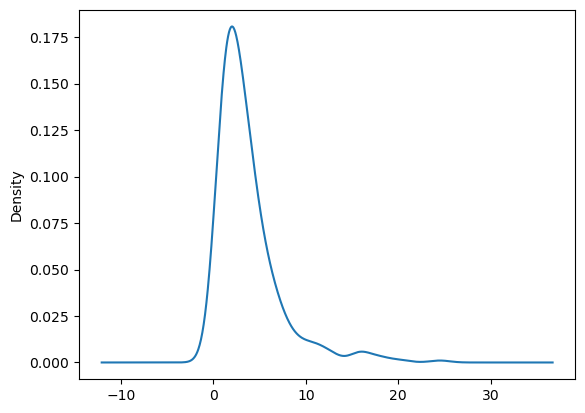

In [169]:
pd.Series(merged.groupby('isbn')['DK_ratings_count'].max() / merged.groupby('isbn')['GR_ratings_count'].max()).plot.density()

In [170]:
pd.Series(merged.groupby('isbn')['DK_ratings_count'].max() / merged.groupby('isbn')['GR_ratings_count'].max()).nlargest()

isbn
9788027910014    24.500000
9788027909872    20.285714
9788027912841    18.625000
9788024951249    17.857143
9788024949949    17.250000
dtype: float64

In [171]:
pd.Series(merged.groupby('isbn')['DK_ratings_count'].max() / merged.groupby('isbn')['GR_ratings_count'].max()).nsmallest()

isbn
9788088433262    0.112676
9788027720613    0.236220
9788088494065    0.255034
9788076617261    0.368782
9788090871250    0.380000
dtype: float64

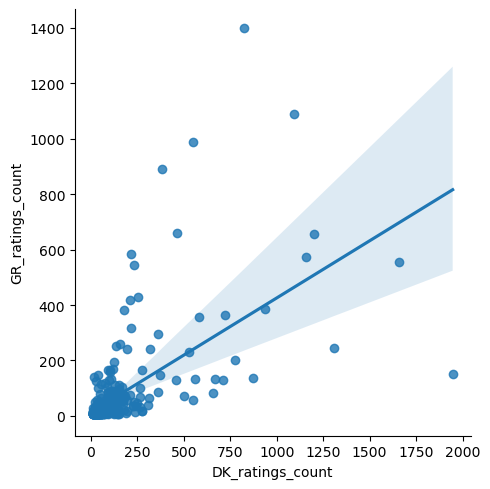

In [172]:
sns.lmplot(x='DK_ratings_count', y='GR_ratings_count', data=merged)

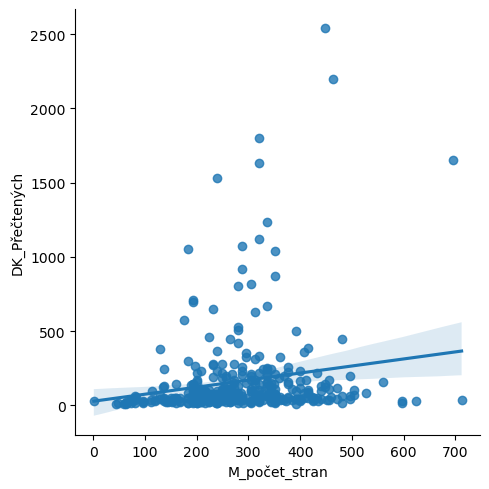

In [173]:
sns.lmplot(x='M_počet_stran', y='DK_Přečtených', data=merged)

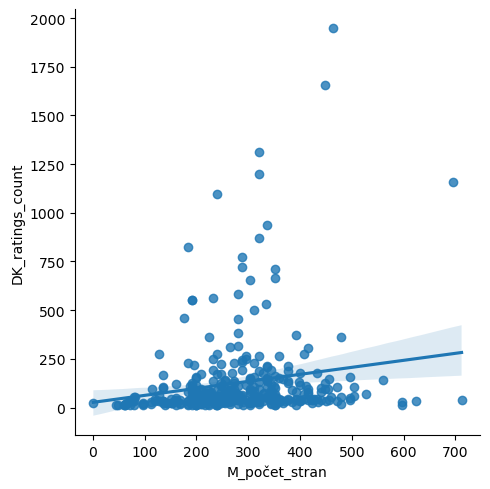

In [174]:
sns.lmplot(x='M_počet_stran', y='DK_ratings_count', data=merged)

In [175]:
zacatek = int(len(merged)*0.5)
konec = int(len(merged)*0.25)
len(merged.head(konec).tail(zacatek))

88

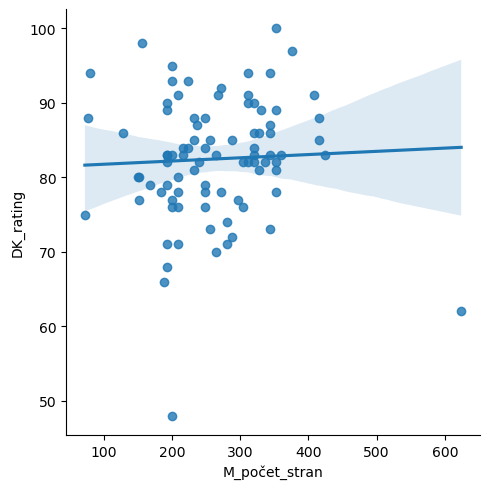

In [176]:
sns.lmplot(x='M_počet_stran', y='DK_rating', data=merged.head(konec).tail(zacatek).sort_values(by='M_počet_stran'))

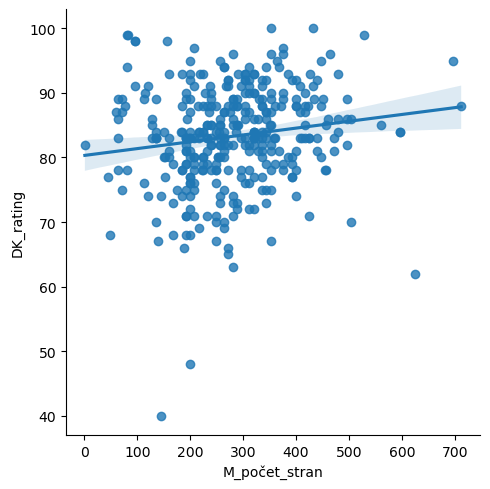

In [177]:
sns.lmplot(x='M_počet_stran', y='DK_rating', data=merged)

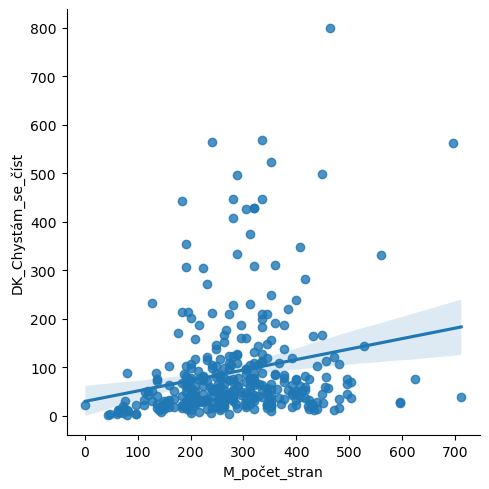

In [178]:
sns.lmplot(x='M_počet_stran', y='DK_Chystám_se_číst', data=merged)

## Co se líbí

In [180]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'DK_autorstvo', 'skore',
       'isbn', 'hezky_titul', 'nakladatel'],
      dtype='object')

In [181]:
tagy = dk.copy()
tagy['DK_tags'] = tagy['DK_tags'].apply(lambda x: x.replace(f"""[""",'').replace(f"""]""",'').replace(f"""'""","").split(', '))
tagy = tagy.explode('DK_tags')
tagy['DK_tags'] = tagy['DK_tags'].apply(lambda x: x.lower())
tagy = tagy[['DK_date','DK_titul','DK_ratings_count','DK_rating','DK_tags']]
tagy = tagy[tagy['DK_date'] > week_ago]

In [182]:
tagy

,DK_date,DK_titul,DK_ratings_count,DK_rating,DK_tags
44741,2024-10-21 03:58:11,Švejk se stává milionářem,3.0,100.0,literatura světová
44741,2024-10-21 03:58:11,Švejk se stává milionářem,3.0,100.0,humor
44742,2024-10-21 03:58:12,Můžeš říct: Miluju tě,84.0,72.0,novely
44742,2024-10-21 03:58:12,Můžeš říct: Miluju tě,84.0,72.0,literatura česká
44742,2024-10-21 03:58:12,Můžeš říct: Miluju tě,84.0,72.0,pro děti a mládež
...,...,...,...,...,...
46938,2024-10-21 04:18:13,Deník z budoucnosti,1.0,60.0,dobrodružné
46938,2024-10-21 04:18:13,Deník z budoucnosti,1.0,60.0,literatura česká
46938,2024-10-21 04:18:13,Deník z budoucnosti,1.0,60.0,pro děti a mládež
46939,2024-10-21 04:18:14,Fotopast,3.0,73.0,literatura česká


In [183]:
romany = tagy[tagy['DK_tags'].str.contains('román',na=False)]['DK_titul'].drop_duplicates().to_list()

In [184]:
tagy['DK_tags'].nunique()

93

In [185]:
dk.sample

<bound method NDFrame.sample of             DK_isbn             DK_date                     DK_titul  \
0      9.788028e+12 2024-04-01 14:39:23             Boží potměšilost   
1      9.788021e+12 2024-04-01 14:39:24       Oprátka za osm mrtvých   
2      9.788072e+12 2024-04-01 14:39:25                        Golem   
3      9.788076e+12 2024-04-01 14:39:26       Proč všichni odcházejí   
4      9.788024e+12 2024-04-01 14:39:27                       Sochař   
...             ...                 ...                          ...   
46935  9.788026e+12 2024-10-21 04:18:11  České podsvětí Josefa Klímy   
46936  9.788075e+12 2024-10-21 04:18:12               Kde končí nebe   
46937  9.788090e+12 2024-10-21 04:18:12                        Magus   
46938  9.788027e+12 2024-10-21 04:18:13          Deník z budoucnosti   
46939  9.788091e+12 2024-10-21 04:18:14                     Fotopast   

       DK_rating  DK_ratings_count  \
0           78.0              18.0   
1           88.0           

In [186]:
nejcastejsi_tagy = tagy.groupby('DK_tags').size()
nejcastejsi_tagy = nejcastejsi_tagy[nejcastejsi_tagy >= 10]
nejcastejsi_tagy = nejcastejsi_tagy.index.to_list()
len(nejcastejsi_tagy)

68

In [187]:
nejcastejsi_tagy

['architektura',
 'astrologie',
 'biografie a memoáry',
 'cestopisy a místopisy',
 'detektivky',
 'dobrodružné',
 'doprava',
 'duchovní literatura',
 'dívčí romány',
 'ekologie',
 'ekonomie a obchod',
 'erotika',
 'eseje',
 'esoterika',
 'fantasy',
 'fejetony',
 'filozofie',
 'historické romány',
 'historie',
 'hobby',
 'horory',
 'hudba a zpěv',
 'humor',
 'komiksy',
 'krimi',
 'literatura faktu',
 'literatura naučná',
 'literatura slovenská',
 'literatura světová',
 'literatura česká',
 'mezinárodní vztahy',
 'novely',
 'náboženství',
 'o literatuře',
 'obrazové publikace',
 'okultismus',
 'osobní rozvoj a styl',
 'poezie',
 'pohádky a bajky',
 'politologie',
 'povídky',
 'pověsti',
 'pragensia',
 'pro děti a mládež',
 'pro nejmenší',
 'pro ženy',
 'právo',
 'psychologie a pedagogika',
 'publicistika',
 'příběhy',
 'příroda',
 'přírodní vědy',
 'rodina',
 'romány',
 'sci-fi',
 'sociologie',
 'společnost',
 'sport',
 'thrillery',
 'umění',
 'vojenství',
 'válečné',
 'věda',
 'zdravotn

In [188]:
zebricek = tagy[(tagy['DK_tags'].isin(nejcastejsi_tagy)) & (tagy['DK_titul'].isin(romany))].groupby('DK_tags')['DK_rating'].mean().sort_values(ascending=False)

In [189]:
zebricek.head(20)

DK_tags
válečné                93.500000
duchovní literatura    90.000000
biografie a memoáry    88.100000
sci-fi                 86.407407
historie               86.333333
literatura faktu       86.000000
hudba a zpěv           85.000000
dívčí romány           83.740741
pro děti a mládež      83.379310
novely                 83.000000
thrillery              82.200000
náboženství            82.000000
fantasy                81.161290
historické romány      81.143885
krimi                  80.112903
detektivky             80.112903
literatura světová     80.000000
pro ženy               79.930000
literatura česká       79.661355
romány                 79.036176
Name: DK_rating, dtype: float64

In [190]:
zebricek.tail(20)

DK_tags
thrillery               82.200000
náboženství             82.000000
fantasy                 81.161290
historické romány       81.143885
krimi                   80.112903
detektivky              80.112903
literatura světová      80.000000
pro ženy                79.930000
literatura česká        79.661355
romány                  79.036176
humor                   78.000000
hobby                   76.000000
erotika                 75.400000
literatura slovenská    74.500000
dobrodružné             74.500000
horory                  74.333333
esoterika               47.000000
okultismus              47.000000
astrologie              47.000000
pragensia               40.000000
Name: DK_rating, dtype: float64

In [191]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'DK_autorstvo', 'skore',
       'isbn', 'hezky_titul', 'nakladatel'],
      dtype='object')

In [192]:
dk['DK_date'] = pd.to_datetime(dk['DK_date'])

In [193]:
dk[dk['DK_titul'] == 'Rozložíš paměť']

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_dalších_seznamech,DK_Doporučených,DK_autorstvo,skore,isbn,hezky_titul,nakladatel
271,9.788076e+12,2024-04-01 14:46:30,Rozložíš paměť,84.0,113.0,"['homosexualita', 'česká literatura', 'dospívá...",10.0,138.0,25.0,47.0,237.0,67.0,4.0,10.0,NaN,375.0,9788076373990,Marek Torčík: Rozložíš paměť,Paseka
1384,9.788076e+12,2024-04-02 10:29:20,Rozložíš paměť,84.0,113.0,"['homosexualita', 'česká literatura', 'dospívá...",10.0,138.0,25.0,47.0,238.0,67.0,4.0,10.0,NaN,376.0,9788076373990,Marek Torčík: Rozložíš paměť,Paseka
2501,9.788076e+12,2024-04-03 16:59:08,Rozložíš paměť,84.0,113.0,"['homosexualita', 'česká literatura', 'dospívá...",10.0,138.0,25.0,47.0,238.0,67.0,4.0,10.0,NaN,376.0,9788076373990,Marek Torčík: Rozložíš paměť,Paseka
3620,9.788076e+12,2024-04-05 10:10:41,Rozložíš paměť,84.0,114.0,"['homosexualita', 'česká literatura', 'dospívá...",10.0,139.0,25.0,47.0,240.0,67.0,4.0,10.0,NaN,379.0,9788076373990,Marek Torčík: Rozložíš paměť,Paseka
4736,9.788076e+12,2024-04-07 13:44:59,Rozložíš paměť,84.0,115.0,"['homosexualita', 'česká literatura', 'dospívá...",12.0,140.0,26.0,47.0,242.0,67.0,4.0,10.0,NaN,382.0,9788076373990,Marek Torčík: Rozložíš paměť,Paseka
5859,9.788076e+12,2024-04-19 23:46:17,Rozložíš paměť,85.0,128.0,"['homosexualita', 'česká literatura', 'dospívá...",15.0,154.0,29.0,54.0,285.0,72.0,5.0,12.0,NaN,439.0,9788076373990,Marek Torčík: Rozložíš paměť,Paseka
7017,9.788076e+12,2024-04-22 03:28:44,Rozložíš paměť,85.0,130.0,"['homosexualita', 'česká literatura', 'dospívá...",13.0,158.0,29.0,55.0,293.0,74.0,5.0,12.0,NaN,451.0,9788076373990,Marek Torčík: Rozložíš paměť,Paseka
8178,9.788076e+12,2024-04-29 03:10:14,Rozložíš paměť,85.0,135.0,"['Romány', 'Literatura česká', 'homosexualita'...",28.0,166.0,30.0,62.0,311.0,80.0,5.0,14.0,NaN,477.0,9788076373990,Marek Torčík: Rozložíš paměť,Paseka
9624,9.788076e+12,2024-05-06 09:57:18,Rozložíš paměť,85.0,146.0,"['Romány', 'Literatura česká', 'homosexualita'...",49.0,184.0,33.0,64.0,310.0,80.0,5.0,14.0,NaN,494.0,9788076373990,Marek Torčík: Rozložíš paměť,Paseka
10839,9.788076e+12,2024-05-13 03:17:54,Rozložíš paměť,86.0,189.0,"['Romány', 'Literatura česká', 'homosexualita'...",34.0,240.0,40.0,76.0,313.0,79.0,5.0,17.0,NaN,553.0,9788076373990,Marek Torčík: Rozložíš paměť,Paseka


In [194]:
dk.groupby(["DK_titul",pd.Grouper(freq="W",key="DK_date")])['DK_rating'].mean()

DK_titul                     DK_date   
#NAJDImě                     2024-10-06    82.0
                             2024-10-13    82.0
                             2024-10-20    82.0
                             2024-10-27    82.0
(NE)uvěřitelný život Oty K.  2024-04-07    60.0
                                           ... 
…a přeskočila jiskra         2024-09-29    58.0
                             2024-10-06    58.0
                             2024-10-13    58.0
                             2024-10-20    58.0
                             2024-10-27    62.0
Name: DK_rating, Length: 42411, dtype: float64

## Novinky

In [196]:
gr.groupby("GR_title")['GR_date'].min().sort_values(ascending=False).head(50)

GR_title
Žabí deník by Kristýna Hartigová                                                                                                    2024-10-21 03:17:11
Neviditelný muž by Bianca Bellová                                                                                                   2024-10-21 02:28:37
Vesnická obec na Moravě mezi osvícenstvím a zrušením poddanství na příkladu privátních statků olomoucké kapituly by Martin Drozda   2024-10-21 02:27:42
Narcis a pivoňka by Katarína Brányiková                                                                                             2024-10-21 02:10:56
Jako po drátku by Ondřej Šanc                                                                                                       2024-10-21 02:08:02
Aristokratka v Československu by Evžen Boček                                                                                        2024-10-21 01:52:07
Hudba srdce by Karel Veselý                                                    

In [197]:
dk.groupby("DK_titul")['DK_date'].min().sort_values(ascending=False).head(50)

DK_titul
Žako a Stopotvorná                                                        2024-10-21 04:17:58
Povídky z jedné a druhé kapsy                                             2024-10-21 04:17:23
Zahradníkův rok                                                           2024-10-21 04:14:25
Moc inkoustu: Středověká knižní kultura na Moravě                         2024-10-21 04:12:46
Nečekaný výstřel                                                          2024-10-21 04:12:10
Jak na pohádku                                                            2024-10-21 04:10:37
Pohádky z Bystřice nad Pernštejnem                                        2024-10-21 04:09:49
Slavkovský les: Krajem ticha a léčivých pramenů                           2024-10-21 04:09:37
Sociální práce: Současné trendy                                           2024-10-21 04:06:58
Aristokratka v Československu                                             2024-10-21 04:05:37
Pohádky pana Zahrádky a paní Pivoňkové             

In [198]:
dk['nakladatel'] = dk['isbn'].apply(lambda x: nakladatelstvi(x))
pribytek = pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()).groupby('nakladatel').sum().reset_index().sum().iloc[1]
nakladatelstvo = pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()).groupby('nakladatel').sum().reset_index()
nakladatelstvo['podil'] = nakladatelstvo['skore'] / pribytek
nakladatelstvo = nakladatelstvo[nakladatelstvo['podil'] >= 0.005]
nakladatelstvo['podil'] = nakladatelstvo['podil'].apply(lambda x: f"""{round(x * 100, 1)}&nbsp;%""".replace(".", ","))
nakladatelstvo = nakladatelstvo.sort_values(by='skore',ascending=False)
nakladatelstvo = nakladatelstvo.drop(columns=['skore'])

In [199]:
nakladatelstvo

,nakladatel,podil
200,Motto,"12,0&nbsp;%"
197,Moba,"9,3&nbsp;%"
127,Host,"8,4&nbsp;%"
130,Ikar CZ,"4,9&nbsp;%"
143,Kalibr,"4,8&nbsp;%"
89,Epocha,"4,2&nbsp;%"
47,Bílá vrána,"3,7&nbsp;%"
21,Argo,"2,9&nbsp;%"
208,Mystery Press,"2,7&nbsp;%"
42,Bourdon,"2,3&nbsp;%"


In [200]:
dk[(dk['DK_date'] > month_ago) & (dk['nakladatel'] == 'Paseka')]

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_dalších_seznamech,DK_Doporučených,DK_autorstvo,skore,isbn,hezky_titul,nakladatel
36513,9.788076e+12,2024-09-23 03:29:52,Třicetiletá válka: Stručná historie,83.0,16.0,"['Literatura naučná', 'Historie']",1.0,21.0,1.0,13.0,24.0,13.0,1.0,1.0,NaN,45.0,9788076374034,Jan Kilian: Třicetiletá válka: Stručná historie,Paseka
36571,9.788076e+12,2024-09-23 03:30:23,Ekstase,81.0,35.0,"['Novely', 'Literatura česká']",1.0,42.0,2.0,2.0,50.0,7.0,NaN,3.0,NaN,92.0,9788076373389,Jakub Šponer: Ekstase,Paseka
36689,9.788076e+12,2024-09-23 03:31:27,Co se stalo Veronice,65.0,79.0,"['Novely', 'Pro ženy', 'Literatura česká']",NaN,106.0,12.0,24.0,44.0,12.0,NaN,2.0,NaN,150.0,9788076373396,Tereza Nováková: Co se stalo Veronice,Paseka
36726,9.788076e+12,2024-09-23 03:31:51,Přístav,73.0,24.0,"['Romány', 'Literatura česká']",NaN,25.0,4.0,2.0,8.0,2.0,NaN,3.0,NaN,33.0,9788076373983,Magdalena Bujabéza Rejžková: Přístav,Paseka
36839,9.788076e+12,2024-09-23 03:32:58,Neviditelné řemeslo: Tajemství redakční práce,89.0,26.0,"['Literatura naučná', 'O literatuře']",8.0,33.0,4.0,18.0,77.0,26.0,1.0,2.0,NaN,110.0,9788076374010,Jakub Sedláček: Neviditelné řemeslo: Tajemství...,Paseka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46236,9.788076e+12,2024-10-21 04:11:45,"Zmizelá Praha: Vesnice, usedlosti a dvory: Pra...",93.0,3.0,"['Literatura česká', 'Historie', 'Pragensia']",NaN,2.0,NaN,3.0,1.0,1.0,NaN,NaN,"['Martin Čerňanský', 'Jana Viktorínová', 'Lubo...",3.0,9788076374027,"['Martin Čerňanský', 'Jana Viktorínová', 'Lubo...",Paseka
46423,9.788076e+12,2024-10-21 04:13:35,Proč všichni odcházejí,84.0,103.0,"['Novely', 'Literatura česká']",3.0,130.0,1.0,42.0,193.0,53.0,NaN,10.0,['Zuzana Dostálová'],323.0,9788076374591,Zuzana Dostálová: Proč všichni odcházejí,Paseka
46612,9.788076e+12,2024-10-21 04:15:15,Karneval zvířat,75.0,151.0,"['Romány', 'Literatura česká']",6.0,195.0,15.0,58.0,110.0,25.0,2.0,3.0,['Zuzana Dostálová'],305.0,9788076373402,Zuzana Dostálová: Karneval zvířat,Paseka
46771,9.788076e+12,2024-10-21 04:16:42,Fosilie,73.0,230.0,"['Romány', 'Literatura česká']",10.0,302.0,47.0,62.0,213.0,45.0,9.0,12.0,['Michal Kašpárek'],515.0,9788076374003,Michal Kašpárek: Fosilie,Paseka


In [201]:
str(datetime.datetime.now())

'2024-10-21 22:02:59.756363'

In [202]:
def koho_vydavaji(nakl):
    global dk
    top = pd.DataFrame(dk[(dk['DK_date'] > month_ago) & (dk['nakladatel'] == nakl)].groupby('hezky_titul')['skore'].max() - dk[(dk['DK_date'] > month_ago) & (dk['nakladatel'] == nakl)].groupby('hezky_titul')['skore'].min()).groupby('hezky_titul').sum().reset_index()
    print(top)
    top = top.groupby('hezky_titul')['skore'].max().nlargest(3).index.to_list()
    print(top)
    top2 = [x.split(":")[0] for x in top if "[" not in x]
    top2 = list(set(top2))
    kolik = len(top2)
    if kolik > 3:
        return top2[:3]
    else:
        return top2

In [203]:
print(koho_vydavaji('Paseka'))

                                          hezky_titul  skore
0   Jakub Sedláček: Neviditelné řemeslo: Tajemství...    3.0
1                               Jakub Šponer: Ekstase    3.0
2     Jan Kilian: Třicetiletá válka: Stručná historie    0.0
3                          Josef Váchal: Krvavý román    0.0
4   Karel Černý: Velké dějiny zemí Koruny české. T...    0.0
5   Kristýna Plíhalová: Bažina v obýváku a jiná do...    2.0
6                Magdalena Bujabéza Rejžková: Přístav    0.0
7                        Marek Torčík: Rozložíš paměť   49.0
8                            Michal Kašpárek: Fosilie   10.0
9                            Miroslav Hlaučo: Letnice   24.0
10                    Ondřej Trhoň: Ještě jeden level    5.0
11  Petr Čornej: Husité na Žižkově: Pomíjivá paměť...    0.0
12         Petr Šabach: Láska je kurva a jiné povídky    0.0
13              Tereza Nováková: Co se stalo Veronice    2.0
14                  Zuzana Dostálová: Karneval zvířat    5.0
15           Zuzana Dost